Learning stock price behavior from earnings call transcripts

In this project, we will outline the different steps involved in analyzing and modeling data. The steps are as follows:

Step 1: Download the data
The first step involves obtaining the necessary data for analysis. This could include downloading datasets from online sources or retrieving data from a database.

Step 2: Load the data
Once the data is downloaded, it needs to be loaded into the analysis environment. This typically involves reading the data into a suitable data structure such as a dataframe or array, depending on the tools and libraries being used.

Step 3: Exploratory data analysis
After loading the data, exploratory data analysis is performed. This step includes examining the structure and properties of the data, identifying missing values or outliers, and gaining insights through visualizations or summary statistics.

Step 4: Convert text to word embeddings
If the data includes text, it may be necessary to convert the text into a numerical representation that can be used in modeling. One common approach is to use word embeddings, which capture semantic relationships between words.

Step 5: Benchmark ARIMA model
In this step, a benchmark ARIMA (AutoRegressive Integrated Moving Average) model is built and evaluated. ARIMA is a popular time series forecasting model that captures patterns and trends in the data to make predictions.

Step 6: Benchmark LSTM price model
Another benchmark model, specifically an LSTM (Long Short-Term Memory) model, is constructed and evaluated. LSTM is a type of recurrent neural network (RNN) that can effectively model sequential data, such as time series.

Step 7: ConvNet feature extraction
For certain types of data, such as images, feature extraction is a crucial step. Convolutional Neural Networks (ConvNets) are often used to extract relevant features from images, enabling further analysis or modeling tasks.

Step 8: LSTM price+text model
Finally, a more advanced model that combines both price data and text data is developed using LSTM. This model aims to leverage the information from multiple sources to make improved predictions or classifications.

By following these steps, data can be analyzed, transformed, and modeled effectively, leading to valuable insights and predictive capabilities.

Overview 

In [1]:
# Standard imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn-notebook')
import seaborn as sns
sns.set()
import matplotlib.cm as cm

# Enable logging
import logging
import sys
logging.basicConfig(level=logging.DEBUG, format='%(asctime)s - %(levelname)s - %(message)s')

This code snippet performs several tasks:

1. It imports necessary libraries: pandas, numpy, matplotlib.pyplot, seaborn, and matplotlib.cm. These libraries provide various functionalities for data manipulation, visualization, and logging.

2. The line `%matplotlib inline` is a Jupyter Notebook magic command that allows matplotlib plots to be displayed directly in the notebook.

3. The line `plt.style.use('seaborn-notebook')` sets the plotting style to "seaborn-notebook," which is a predefined style provided by the seaborn library for better visual aesthetics.

4. The line `sns.set()` sets the default seaborn theme for visualizations.

5. It imports the logging module and configures the basic logging settings. This enables logging of messages with different levels (such as DEBUG, INFO, WARNING, ERROR, etc.) and formats the log messages to include the timestamp, log level, and message content.

Overall, this code sets up the environment for data analysis and visualization by importing necessary libraries, configuring plotting styles, enabling logging, and ensuring that matplotlib plots are displayed inline in a Jupyter Notebook.

To obtain a list of S&P 500 companies, we can refer to a file that contains relevant information downloaded from Wikipedia. Although this project focuses primarily on utilizing the ticker symbols from the list, additional features such as 'GICS_sector' and 'GICS_sub_industry' could potentially be beneficial for our purposes.

In [85]:
column_names = ['ticker', 'security', 'filings', 'GICS_sector', 'GICS_sub_industry', 'HQ_address', 'date_added', 'CIK']
sp500companies = pd.read_csv('data/S&P500.csv', header = 0, names = column_names).drop(['filings'], axis=1)
sp500companies = sp500companies.set_index(['ticker'])
sp500companies.head(10)

security             GICS_sector  \
ticker                                                       
MMM                     3M Company             Industrials   
ABT            Abbott Laboratories             Health Care   
ABBV                   AbbVie Inc.             Health Care   
ACN                  Accenture plc  Information Technology   
ATVI           Activision Blizzard  Information Technology   
AYI              Acuity Brands Inc             Industrials   
ADBE             Adobe Systems Inc  Information Technology   
AMD     Advanced Micro Devices Inc  Information Technology   
AAP             Advance Auto Parts  Consumer Discretionary   
AES                       AES Corp               Utilities   

                                   GICS_sub_industry  \
ticker                                                 
MMM                         Industrial Conglomerates   
ABT                            Health Care Equipment   
ABBV                                 Pharmaceuticals   
ACN                   IT Consulting & Other Services   
ATVI                     Home Entertainment Software   
AYI                Electrical Components & Equipment   
ADBE                            Application Software   
AMD                                   Semiconductors   
AAP                                Automotive Retail   
AES     Independent Power Producers & Energy Traders   

                      HQ_address date_added      CIK  
ticker                                                
MMM          St. Paul, Minnesota        NaN    66740  
ABT      North Chicago, Illinois    3/31/64     1800  
ABBV     North Chicago, Illinois   12/31/12  1551152  
ACN              Dublin, Ireland     7/6/11  1467373  
ATVI    Santa Monica, California    8/31/15   718877  
AYI             Atlanta, Georgia     5/3/16  1144215  
ADBE        San Jose, California     5/5/97   796343  
AMD        Sunnyvale, California    3/20/17     2488  
AAP            Roanoke, Virginia     7/9/15  1158449  
AES          Arlington, Virginia        NaN   874761

This code snippet performs the following operations on a dataset:

Firstly, it defines a list of column names that will be used to label the attributes or information associated with the S&P 500 companies. These column names include 'ticker', 'security', 'filings', 'GICS_sector', 'GICS_sub_industry', 'HQ_address', 'date_added', and 'CIK'.

Next, the code reads a CSV file named 'S&P500.csv' from the 'data' directory. The header parameter is set to 0, indicating that the first row of the file contains the column headers. The names parameter assigns the previously defined column_names list as the column headers for the resulting pandas DataFrame, which is stored in the variable 'sp500companies'.

Subsequently, the code drops the 'filings' column from the 'sp500companies' DataFrame using the drop() function. The axis parameter is set to 1, indicating that we want to drop columns. As a result, the updated DataFrame no longer includes the 'filings' column.

Following that, the code sets the index of the 'sp500companies' DataFrame to be the 'ticker' column using the set_index() function. This operation modifies the DataFrame so that the 'ticker' column serves as the row index, which can provide convenient access to data based on ticker symbols.

Lastly, the code displays the first 10 rows of the modified 'sp500companies' DataFrame using the head() function. This provides a preview of the dataset, allowing us to examine the column names, along with their associated values, for the initial portion of the DataFrame.

In summary, this code reads a CSV file containing information about S&P 500 companies, creates a DataFrame with the provided column names, removes the 'filings' column, sets the 'ticker' column as the index, and displays a subset of the resulting DataFrame to give an overview of the data.

Download the price data.

Run the cell below to download S&P 500 company prices between the two specified dates.

In [805]:
import pandas_datareader as pdr

start = pd.to_datetime('2009-01-01')
end = pd.to_datetime('2017-01-01')
source = 'google'

for company in sp500companies.index:
    try:
        price_data = pdr.DataReader(company, source, start, end)
        price_data['Close'].to_csv('data/company_prices/%s_adj_close.csv' % company)
    except:
        logging.error("Oops! %s occured for %s. \nMoving on to next entry." % (sys.exc_info()[0], company))

This code snippet carries out the following tasks:

Firstly, the pandas_datareader library is imported and aliased as 'pdr'. This library provides functionality to fetch financial data from various online sources.

Next, two variables, 'start' and 'end', are assigned date values using the pd.to_datetime() function. These dates specify the range for retrieving price data, with 'start' representing January 1, 2009, and 'end' representing January 1, 2017.

The variable 'source' is set to 'google', indicating the desired data source from which the price data will be obtained.

The code then enters a loop that iterates over each company in the index of the 'sp500companies' DataFrame, representing the S&P 500 companies.

Within the loop, an attempt is made to fetch the price data for each company using the pdr.DataReader() function. This function takes parameters such as the company symbol, data source ('google'), and the specified start and end dates. The retrieved price data is stored in the 'price_data' variable.

Subsequently, the 'Close' column of the 'price_data' DataFrame, which represents the closing prices of the company's stock, is saved as a CSV file. The to_csv() function is utilized to export the data, and the file is saved in the 'data/company_prices/' directory. The file name is based on the company symbol, with '_adj_close.csv' appended.

In the event that an exception occurs during the retrieval of price data for a particular company, the code handles the exception using a try-except block. An error message is logged using the logging.error() function, providing information about the specific exception that occurred and the name of the company. This allows the code to continue executing for the remaining companies in the loop.

To summarize, this code retrieves historical price data for each S&P 500 company from the 'google' data source. It saves the closing prices for each company as individual CSV files in the 'data/company_prices/' directory. If any exceptions occur during the retrieval process, error messages are logged to indicate the specific error and the corresponding company.

Load the data

### Load transcript data

In [2]:
# Read in a collection of company transcripts
def load_company_transcripts(company):
    '''
    Reads a company's transcripts into a Pandas DataFrame. 
    
    Args:
        company: The ticker symbol for the desired company. 
    '''
    logging.debug('Reading company transcripts for {}'.format(company))
    
    # Read file
    text_data = pd.read_json('data/company_transcripts/{}.json'.format(company), lines=True)
    
    # Drop events that don't have an associated date
    text_data = text_data.dropna(axis = 0, subset= ['date'])
    
    # Reindex according to the date
    text_data = text_data.set_index('date').sort_index()
    
    # Check for possible duplicate entries from scraping
    if sum(text_data.duplicated(['title'])) > 0:
        logging.warning('{} duplicates removed from file'.format(sum(text_data.duplicated(['title']))))
        text_data = text_data.drop_duplicates(['title'])
               
    # Concatenate body into single body of text
    text_data['body'] = text_data['body'].apply(lambda x: ' '.join(x))
    
    # Add a column to each transcript for word count, plot histogram
    text_data['count'] = text_data['body'].apply(lambda x: len(x.split()))
    
    # Check for empty transcripts
    if len(text_data[text_data['count'] == 0]) > 0:
        logging.warning('{} empty transcripts removed from file'.format(len(text_data[text_data['count'] == 0])))
    text_data = text_data[text_data['count'] != 0]
    
    return text_data

This code defines a function called 'load_company_transcripts' that loads and processes transcripts of a specified company into a pandas DataFrame.

The function takes a company's ticker symbol as an argument and reads the corresponding transcripts from a JSON file located in the 'data/company_transcripts/' directory.

After reading the file, the code removes events that do not have an associated date by dropping rows with missing values in the 'date' column.

The DataFrame is then reindexed based on the 'date' column and sorted in ascending order.

To address possible duplicate entries resulting from web scraping, the code checks for duplicated 'title' values and removes any duplicate rows, if found. A warning message is logged to indicate the number of duplicates removed.

The 'body' column, which contains the transcript text, is concatenated into a single body of text by joining the individual strings using whitespace.

A new column called 'count' is added to the DataFrame, representing the word count of each transcript. A histogram of the word counts can be plotted if desired.

Next, the code checks for and removes any empty transcripts by filtering out rows with a word count of zero. A warning message is logged to indicate the number of empty transcripts removed.

Finally, the processed DataFrame is returned as the output of the 'load_company_transcripts' function.

In summary, this code defines a function that reads and preprocesses transcripts of a specified company. It performs various operations such as dropping rows with missing dates, removing duplicate entries, concatenating transcript text, adding a word count column, and filtering out empty transcripts. The resulting processed DataFrame is then returned for further analysis or use.

### Load price data

In [3]:
def load_company_price_history(companies, normalize = False, fillna = True, dropna=True):
    ''' 
    Builds a DataFrame where each column contains one company's adjusted closing price history.
    
    Args:
        companies: A list of company ticker symbols to load.
        normalize: Boolean flag to calculate the log-returns from the raw price data. 
        fillna: Boolean flag to fill null values. Limited fill up to 5 days forward and 1 day backward,
        for companies with long periods of null values, this prevents from creating a stagnant time series.
        Instead, those companies should be dropped using `dropna=true`.
        dropna: Boolean flag to drop companies that don't have a full price history. 
         
    '''
    prices = []
    for company in companies:
        logging.debug('Reading company prices for {}'.format(company))
        price_history = pd.read_csv('data/company_prices/{}_adj_close.csv'.format(company), 
                                    names=[company], index_col=0)
        prices.append(price_history)
        
    df = pd.concat(prices, axis=1)
    df.index = pd.to_datetime(df.index)
    df = df.asfreq('B', method='ffill')
   
    if normalize:
        df = np.log(df).diff() # Calculate the log-return, first value becomes null
        df.iloc[0] = df.iloc[1] # Forward fill the null value
        
    if fillna:
        df = df.fillna(method = 'ffill', limit=5) # First pass fill NAs as previous day price
        df = df.fillna(method = 'bfill', limit=1) # For NAs with no prev value (ie. first day), fill NA as next day price
    
    if dropna:
        # Validate quality of data (null values, etc)
        # Drop any companies that don't have a full 8-year history
        df = df.dropna(axis=1, how='any')
        assert df.isnull().values.any() == 0
        logging.debug('Null values found after cleaning: {}'.format(df.isnull().values.any()))
        
    
    return df

This code defines a function called 'load_company_price_history' that builds a DataFrame containing the adjusted closing price history for a list of companies.

The function takes the following arguments: 'companies' (a list of company ticker symbols to load), 'normalize' (a boolean flag to calculate the log-returns from the raw price data), 'fillna' (a boolean flag to fill null values in the DataFrame), and 'dropna' (a boolean flag to drop companies that do not have a full price history).

Inside the function, a list called 'prices' is initialized to store the price histories of the companies.

The code then iterates over each company in the 'companies' list, reads the corresponding price history from a CSV file located in the 'data/company_prices/' directory, and appends it to the 'prices' list.

The 'prices' list is then concatenated along the column axis using the pd.concat() function to create the final DataFrame named 'df'.

The index of 'df' is converted to a datetime format using pd.to_datetime().

The DataFrame is then resampled to a business day frequency ('B') and forward-filled to ensure that each business day has a corresponding price value.

If the 'normalize' flag is set to True, the log-returns of the prices are calculated by taking the logarithmic difference between consecutive values. The first log-return value becomes null, so it is forward-filled with the second value.

If the 'fillna' flag is set to True, null values in the DataFrame are filled using a forward-fill method with a limit of 5 days and a backward-fill method with a limit of 1 day.

If the 'dropna' flag is set to True, companies that do not have a full 8-year price history (containing null values) are dropped from the DataFrame.

The cleaned and processed DataFrame is returned as the output of the function.

In summary, this code defines a function that reads and processes the adjusted closing price histories of a list of companies. It creates a DataFrame with each column representing the price history of a company. Options are provided to normalize the data, fill null values, and drop companies with incomplete price histories. The resulting cleaned DataFrame is returned for further analysis or use.

### Read file directory and load all available data

In [4]:
# Go to data folder and get list of all companies that have data
import glob
import re

# All files for price history
price_files = glob.glob('data/company_prices/*_adj_close.csv')
company_prices = [re.search(r'(?<=data\/company_prices\/)(.*)(?=_adj_close.csv)', f).group(0) 
                  for f in price_files]
logging.info('{} company price histories available.'.format(len(company_prices)))

# All files for transcripts
transcript_files = glob.glob('data/company_transcripts/*.json')
company_transcripts = [re.search(r'(?<=data\/company_transcripts\/)(.*)(?=.json)', f).group(0) 
                       for f in transcript_files]
logging.info('{} company transcripts available.'.format(len(company_transcripts)))

# Intersection of two datasets
company_both = list(set(company_prices) & set(company_transcripts))
logging.info('{} companies have both transcripts and price history available.'.format(len(company_both)))

2017-10-04 09:52:44,215 - INFO - 502 company price histories available.
2017-10-04 09:52:44,219 - INFO - 173 company transcripts available.
2017-10-04 09:52:44,220 - INFO - 170 companies have both transcripts and price history available.


This code performs the following actions:

The code starts by importing the 'glob' and 're' libraries. 'glob' allows for file path expansion and retrieval, while 're' provides regular expression functionality.

The 'glob.glob()' function is used to retrieve a list of file paths that match the pattern 'data/company_prices/*_adj_close.csv'. This pattern corresponds to all files in the 'data/company_prices/' directory with names ending in '_adj_close.csv'. The resulting list of file paths is stored in the 'price_files' variable.

A list comprehension is then used to extract the company ticker symbols from the file paths. The 're.search()' function is applied to each file path in 'price_files' using a regular expression pattern to extract the desired portion of the path. The extracted ticker symbols are stored in the 'company_prices' list.

The code logs an informational message indicating the number of company price histories available.

Similarly, the 'glob.glob()' function is used again to retrieve a list of file paths matching the pattern 'data/company_transcripts/*.json'. This pattern corresponds to all files in the 'data/company_transcripts/' directory with names ending in '.json'. The resulting list of file paths is stored in the 'transcript_files' variable.

Another list comprehension is employed to extract the company ticker symbols from the transcript file paths, similar to the previous step. The extracted ticker symbols are stored in the 'company_transcripts' list.

An informational log message is generated to indicate the number of company transcripts available.

The code then calculates the intersection of the 'company_prices' and 'company_transcripts' lists using the 'set()' function and the '&' operator. This intersection represents the companies for which both price history and transcript data are available. The resulting ticker symbols are stored in the 'company_both' list.

Finally, an informational log message is generated to indicate the number of companies that have both transcripts and price history available.

In summary, this code scans the 'data' directory to identify the available company price history and transcript files. It retrieves the company ticker symbols from the file paths and logs the number of available price histories, transcripts, and the number of companies that have both transcripts and price history data. This information can be useful for further analysis or data processing tasks.

In [5]:
# Load all pricing data into memory
company_price_df = load_company_price_history(company_both, normalize=True)

2017-10-04 09:52:45,676 - DEBUG - Reading company prices for ECL
2017-10-04 09:52:45,680 - DEBUG - Reading company prices for AAL
2017-10-04 09:52:45,683 - DEBUG - Reading company prices for XRAY
2017-10-04 09:52:45,686 - DEBUG - Reading company prices for CVX
2017-10-04 09:52:45,689 - DEBUG - Reading company prices for ACN
2017-10-04 09:52:45,692 - DEBUG - Reading company prices for COF
2017-10-04 09:52:45,696 - DEBUG - Reading company prices for DISCK
2017-10-04 09:52:45,699 - DEBUG - Reading company prices for AXP
2017-10-04 09:52:45,702 - DEBUG - Reading company prices for CVS
2017-10-04 09:52:45,705 - DEBUG - Reading company prices for AMGN
2017-10-04 09:52:45,708 - DEBUG - Reading company prices for CNP
2017-10-04 09:52:45,711 - DEBUG - Reading company prices for DD
2017-10-04 09:52:45,714 - DEBUG - Reading company prices for SCHW
2017-10-04 09:52:45,717 - DEBUG - Reading company prices for APD
2017-10-04 09:52:45,720 - DEBUG - Reading company prices for DVN
2017-10-04 09:52:45,7

2017-10-04 09:52:46,121 - DEBUG - Reading company prices for AMAT
2017-10-04 09:52:46,124 - DEBUG - Reading company prices for BMY
2017-10-04 09:52:46,127 - DEBUG - Reading company prices for MO
2017-10-04 09:52:46,130 - DEBUG - Reading company prices for CF
2017-10-04 09:52:46,133 - DEBUG - Reading company prices for AIG
2017-10-04 09:52:46,136 - DEBUG - Reading company prices for CME
2017-10-04 09:52:46,139 - DEBUG - Reading company prices for CPB
2017-10-04 09:52:46,142 - DEBUG - Reading company prices for DG
2017-10-04 09:52:46,145 - DEBUG - Reading company prices for BK
2017-10-04 09:52:46,149 - DEBUG - Reading company prices for CSX
2017-10-04 09:52:46,153 - DEBUG - Reading company prices for XEC
2017-10-04 09:52:46,156 - DEBUG - Reading company prices for AMP
2017-10-04 09:52:46,160 - DEBUG - Reading company prices for CAT
2017-10-04 09:52:46,163 - DEBUG - Reading company prices for CAG
2017-10-04 09:52:46,167 - DEBUG - Reading company prices for CTAS
2017-10-04 09:52:46,170 - D

This code snippet performs the following action:

The code calls the 'load_company_price_history' function to load the pricing data for the companies that have both transcripts and price history available. The function takes two arguments: the list of ticker symbols of the companies with both data, and a boolean flag 'normalize' set to True, indicating that the pricing data should be normalized by calculating the log-returns.

The function 'load_company_price_history' builds a DataFrame that contains the adjusted closing price history for each company in the 'company_both' list. If the 'normalize' flag is set to True, it calculates the log-returns from the raw price data.

The resulting DataFrame, containing the pricing data for the selected companies, is assigned to the 'company_price_df' variable.

In summary, this code loads the pricing data for the companies that have both transcripts and price history available, and stores the data in the 'company_price_df' DataFrame for further analysis or use.

In [6]:
# Load all transcript data into memory
company_transcripts_dict = {}
failures= []

for company in company_transcripts:
    try:
        company_transcripts_dict[company] = load_company_transcripts(company)
    except:
        logging.error("Oops! {} occured for {}. \nMoving on to next entry.".format(sys.exc_info()[0], company))
        failures.append(company)

2017-10-04 09:52:51,910 - DEBUG - Reading company transcripts for A
2017-10-04 09:52:51,979 - DEBUG - Reading company transcripts for AAL
2017-10-04 09:52:52,080 - DEBUG - Reading company transcripts for AAP
2017-10-04 09:52:52,150 - DEBUG - Reading company transcripts for AAPL
2017-10-04 09:52:52,213 - DEBUG - Reading company transcripts for ABBV
2017-10-04 09:52:52,251 - DEBUG - Reading company transcripts for ABC
2017-10-04 09:52:52,314 - DEBUG - Reading company transcripts for ABT
2017-10-04 09:52:52,345 - WARNING - 1 duplicates removed from file
2017-10-04 09:52:52,422 - DEBUG - Reading company transcripts for ACN
2017-10-04 09:52:52,483 - DEBUG - Reading company transcripts for ADBE
2017-10-04 09:52:52,546 - DEBUG - Reading company transcripts for ADI
2017-10-04 09:52:52,548 - ERROR - Oops! <class 'KeyError'> occured for ADI. 
Moving on to next entry.
2017-10-04 09:52:52,549 - DEBUG - Reading company transcripts for ADM
2017-10-04 09:52:52,580 - WARNING - 2 duplicates removed fro

2017-10-04 09:52:58,818 - WARNING - 1 duplicates removed from file
2017-10-04 09:52:58,901 - DEBUG - Reading company transcripts for CMI
2017-10-04 09:52:58,962 - DEBUG - Reading company transcripts for CNC
2017-10-04 09:52:59,010 - DEBUG - Reading company transcripts for CNP
2017-10-04 09:52:59,061 - DEBUG - Reading company transcripts for COF
2017-10-04 09:52:59,138 - DEBUG - Reading company transcripts for COG
2017-10-04 09:52:59,194 - DEBUG - Reading company transcripts for COH
2017-10-04 09:52:59,255 - DEBUG - Reading company transcripts for COO
2017-10-04 09:52:59,306 - DEBUG - Reading company transcripts for COP
2017-10-04 09:52:59,377 - WARNING - 43 duplicates removed from file
2017-10-04 09:52:59,454 - DEBUG - Reading company transcripts for COST
2017-10-04 09:52:59,553 - DEBUG - Reading company transcripts for COTY
2017-10-04 09:52:59,585 - DEBUG - Reading company transcripts for CPB
2017-10-04 09:52:59,645 - DEBUG - Reading company transcripts for CSCO
2017-10-04 09:52:59,73

This code snippet performs the following actions:

The code initializes an empty dictionary called 'company_transcripts_dict' to store the transcript data for each company. Additionally, an empty list called 'failures' is created to keep track of any companies for which the transcript data loading fails.

The code enters a loop that iterates over each company in the 'company_transcripts' list, which contains the ticker symbols of companies with available transcripts.

Within the loop, an attempt is made to load the transcripts for each company using the 'load_company_transcripts' function. The function takes the company ticker symbol as an argument and returns the transcript data as a pandas DataFrame.

If loading the transcript data for a particular company encounters an exception, an error message is logged using the logging.error() function. The message includes information about the specific exception that occurred and the name of the company. Additionally, the company ticker symbol is appended to the 'failures' list to keep track of the failed attempts.

The code continues to execute for the remaining companies in the loop, regardless of whether an exception occurred or not.

In summary, this code loads the transcript data for each company in the 'company_transcripts' list and stores it in the 'company_transcripts_dict' dictionary. If any exceptions occur during the loading process, error messages are logged and the corresponding company ticker symbol is added to the 'failures' list. This allows for the identification of companies whose transcript data loading was unsuccessful.

In [7]:
failures

['ADI', 'BHF', 'CTHS', 'ED', 'ETN']

This code snippet retrieves and stores the ticker symbols of companies for which loading the transcript data encountered an exception or failure. 

The variable 'failures' is a list that keeps track of the ticker symbols of companies whose transcript data loading was unsuccessful. 

These ticker symbols are added to the 'failures' list whenever an exception occurs during the loading process. 

The 'failures' list serves as a record of the companies for which transcript data retrieval encountered issues. It can be used for further analysis or troubleshooting purposes.

Inspecting the files for these failures, they were all empty files. 

Sample a few companies for further inspection

In [8]:
# Select companies to load and inspect
google_transcripts = company_transcripts_dict['GOOG']
amazon_transcripts = company_transcripts_dict['AMZN']
adobe_transcripts = company_transcripts_dict['ADBE']
apple_transcripts = company_transcripts_dict['AAPL']

transcript_samples = [google_transcripts, amazon_transcripts, adobe_transcripts, apple_transcripts]

google_prices = company_price_df['GOOG']
amazon_prices = company_price_df['AMZN']
adobe_prices = company_price_df['ADBE']
apple_prices = company_price_df['AAPL']

price_samples = load_company_price_history(['GOOG', 'AMZN', 'ADBE', 'AAPL'], normalize=True)

2017-10-04 09:54:54,836 - DEBUG - Reading company prices for GOOG
2017-10-04 09:54:54,843 - DEBUG - Reading company prices for AMZN
2017-10-04 09:54:54,847 - DEBUG - Reading company prices for ADBE
2017-10-04 09:54:54,850 - DEBUG - Reading company prices for AAPL
2017-10-04 09:54:54,899 - DEBUG - Null values found after cleaning: False


This code snippet performs the following actions:

The code selects specific companies' transcript data and assigns them to separate variables. The transcripts for the companies with ticker symbols 'GOOG', 'AMZN', 'ADBE', and 'AAPL' are stored in the variables 'google_transcripts', 'amazon_transcripts', 'adobe_transcripts', and 'apple_transcripts', respectively.

These transcript variables are then combined into a list called 'transcript_samples', which serves as a collection of selected transcript data for further analysis.

Similarly, the code selects the price data for the same set of companies and assigns them to separate variables. The price data for the companies 'GOOG', 'AMZN', 'ADBE', and 'AAPL' are stored in the variables 'google_prices', 'amazon_prices', 'adobe_prices', and 'apple_prices', respectively.

Additionally, the 'load_company_price_history' function is called with the ticker symbols 'GOOG', 'AMZN', 'ADBE', and 'AAPL' as arguments to load and normalize the price data for these companies. The resulting price data is stored in the variable 'price_samples'.

In summary, this code selects specific companies' transcript and price data, assigning them to separate variables. It creates a list ('transcript_samples') containing the selected transcript data and separately stores the price data for each company. It also loads and normalizes the price data for the selected companies, storing the result in the 'price_samples' variable for further analysis or use.

In [9]:
google_transcripts

analysts  \
date                                                            
2006-02-01  [Heath Terry, Credit Suisse First Boston  Anth...   
2006-10-17  [Edward Snyder - Charter Equity Research  Ehud...   
2006-10-19  [Mark Mahaney - Citigroup ,  Robert Peck – Bea...   
2007-01-19  [Edward Snyder - Charter Equity Research ,  It...   
2007-01-31  [Anthony Noto - Goldman Sachs ,  Mark Mahaney ...   
2007-04-18  [Scott Coleman - Morgan Stanley ,  Phil Cusick...   
2007-04-19                                      Parsing error   
2007-07-19  [Anthony Noto - Goldman Sachs ,  Imran Khan – ...   
2007-07-19  [Tim Long - Banc of America Securities ,  Matt...   
2007-10-18  [Imran Khan - J.P. Morgan, Anthony Noto - Gold...   
2007-10-25  [, Jim Suva - Citigroup, Phil Cusick - Bear St...   
2008-01-23  [Matthew Hoffman - Cowen, Mike Walkley - Piper...   
2008-01-31  [Imran Khan - J.P. Morgan, Douglas Anmuth - Le...   
2008-04-18  [Ben Schachter - UBS Securities, Justin Post -...   
2008-04-24  [Maynard Um - UBS, Phil Cusick - Bear Stearns,...   
2008-07-17  [Imran Khan - JP Morgan, Brian Pitz - Banc of ...   
2008-07-31  [Nathan Johnson - Pacific Crest, Ehud Gelblum ...   
2008-10-16  [Imran Khan - JPMorgan, Mark Mahaney - Citi, B...   
2008-10-30  [Ittai Kidron - Oppenheimer, Jim Suva - Citi, ...   
2009-01-22  [Ben Schachter - UBS, Imran Khan - JPMorgan, J...   
2009-02-03  [, Vivek Arya - Merrill Lynch, Samuel Wilsom -...   
2009-04-17  [James Mitchell - Goldman Sachs, Justin Post -...   
2009-04-30  [Vivek Arya - Merrill Lynch, Samuel Wilsom - J...   
2009-07-16  [Imran Khan - J.P. Morgan, Mark Mahaney - Citi...   
2009-07-30  [Tim Long - BMO Capital Markets, Phil Cusick -...   
2009-10-15  [Mark May - Needham & Company, Imran Khan - JP...   
2009-10-29  [Ittai Kidron – Oppenheimer & Co., Mark Sue – ...   
2010-01-21  [Samit Sinha – JMP Securities, Aaron Kessler –...   
2010-01-21  [James Mitchell - Goldman Sachs, Mark Mahaney ...   
2010-01-28  [Ittai Kidron – Oppenheimer Funds, Tavis McCou...   
...                                                       ...   
2010-07-30  [Tal Liani - BofA Merrill Lynch, Richard Krame...   
2010-10-14  [James Mitchell – Goldman Sachs, Spencer Wang ...   
2010-10-28  [Tal Liani - BofA Merrill Lynch, Maynard Um - ...   
2011-01-21  [Scott Devitt - Morgan Stanley, Steve Weinstei...   
2011-04-15  [Scott Devitt - Morgan Stanley, Brian Pitz - U...   
2011-07-14  [Brian Pitz - UBS Investment Bank, Spencer Wan...   
2011-07-28  [, Ittai Kidron – Oppenheimer & Co, Brian Modo...   
2011-10-13  [Jeetil J. Patel - Deutsche Bank AG, Research ...   
2012-01-19  [Herman Leung - Susquehanna Financial Group, L...   
2012-04-12  [Spencer Wang - Crédit Suisse AG, Research Div...   
2012-07-19  [Mark S. Mahaney – Citigroup, Spencer Wang – C...   
2012-10-18  [Ross A. Sandler – Deutsche Bank Securities, I...   
2013-01-22  [Carlos Kirjner - Bernstein, Ben Schachter - M...   
2013-04-18  [Mark Mahaney – RBC Capital Markets LLC, Ben S...   
2013-07-18  [Ross Sandler - Deutsche Bank, Ben Schachter -...   
2013-10-17  [Mark Mahaney - RBC Capital Markets LLC, Ben S...   
2014-01-30  [Carlos Kirjner - Sanford C. Bernstein & Co., ...   
2014-04-16  [Ben Schachter - Macquarie, Douglas Anmuth - J...   
2014-07-17  [Mark Mahaney - RBC Capital Markets, Eric Sher...   
2014-10-16  [Eric Sheridan - UBS, Justin Post - Bank of Am...   
2015-01-29  [Stephen Ju - Credit Suisse, Carlos Kirjner - ...   
2015-04-23  [Carlos Kirjner – Bernstein, Mark Mahaney – RB...   
2015-07-16  [Ross Sandler – Duetsche Bank, Carlos Kirjner ...   
2015-10-22  [Mark Mahaney - RBC Capital Markets, Ross Sand...   
2016-04-21  [Eric J. Sheridan - UBS Securities LLC, Carlos...   
2016-07-28  [Carlos Kirjner-Neto - Sanford C. Bernstein & ...   
2016-10-27  [Eric J. Sheridan - UBS Securities LLC, Heathe...   
2017-01-26  [Heather Bellini - Goldman Sachs & Co., Eric J...   
2017-04-27  [Douglas T. Anmuth - JPMorgan Securities LLC, ...   
2017-07-24  [Eric Sheri

This code snippet retrieves and stores the transcript data specifically for the company with the ticker symbol 'GOOG', which is Google.

The variable 'google_transcripts' represents the transcript data for the Google company.

This transcript data can be further analyzed or used for various purposes such as sentiment analysis, natural language processing, or extracting insights from the textual information provided in the transcripts.

Exploratory data analysis

In [13]:
# Calculate average word count across all company transcripts
companies_avg_word_count = []

for company in company_transcripts_dict:
    company_avg = company_transcripts_dict[company]['count'].mean()
    companies_avg_word_count.append(company_avg)
    
print('Average word count in transcripts: {}'.format(np.mean(np.array(companies_avg_word_count))))

Average word count in transcripts: 9449.255561736534


This code snippet performs the following actions:

The code calculates the average word count across all company transcripts available in the 'company_transcripts_dict' dictionary.

A loop iterates over each company in the 'company_transcripts_dict' dictionary.

Within the loop, the code retrieves the transcript DataFrame for each company using 'company_transcripts_dict[company]'. It then calculates the mean word count by accessing the 'count' column of the transcript DataFrame and applying the mean() function.

The calculated average word count for each company is appended to the 'companies_avg_word_count' list.

Finally, the code prints the average word count across all company transcripts by calculating the mean of the 'companies_avg_word_count' list using the np.mean() function.

In summary, this code calculates the average word count for each company's transcript and then computes the overall average word count across all company transcripts. The result is printed as an output, providing an insight into the average length of the transcripts.

<a id='step1'></a>
### Visualize loaded transcript data

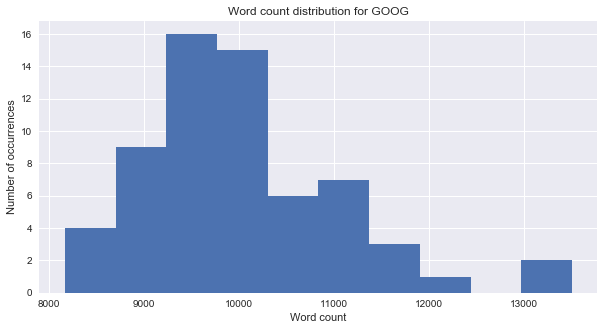

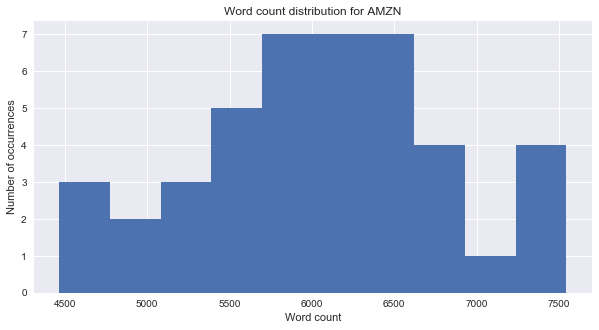

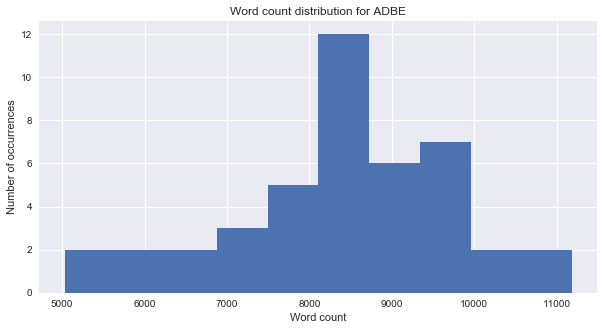

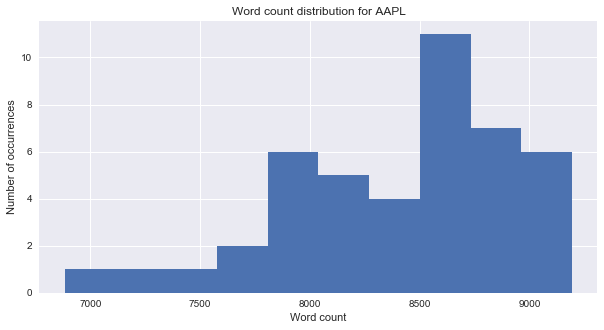

In [24]:
# Plot histogram of word counts for company transcripts
def visualize_word_count(transcripts):
    '''
    Plots a histogram of a company's transcript word counts.
    
    Args:
        transcripts: A Pandas DataFrame containing a company's history of earnings calls.
    '''
    
    company = transcripts['company'][0]
    fig, ax = plt.subplots(figsize=(10,5))
    ax.hist(transcripts['count'])
    plt.title("Word count distribution for {}".format(company))
    ax.set_xlabel('Word count')
    ax.set_ylabel('Number of occurrences')

for company in transcript_samples:
    visualize_word_count(company)

This code snippet performs the following actions:

The code defines a function called 'visualize_word_count' that plots a histogram of word counts for a company's transcript data. The function takes a Pandas DataFrame containing the transcript data as an argument.

Within the function, the company name is extracted from the transcript data using 'transcripts['company'][0]'. This assumes that the 'company' column contains the name of the company and takes the value from the first row of the DataFrame.

A figure and axis object are created using 'plt.subplots(figsize=(10,5))', specifying the size of the figure.

The histogram of word counts is plotted using 'ax.hist(transcripts['count'])', where 'transcripts['count']' refers to the column containing the word counts.

Title, x-axis label, and y-axis label are set for the plot.

The code then enters a loop that iterates over each company in the 'transcript_samples' list, which contains the selected transcript data for multiple companies.

Within the loop, the 'visualize_word_count' function is called for each company's transcript data, generating a histogram plot of the word counts for that company.

In summary, this code defines a function to visualize the word count distribution for a company's transcript data by plotting a histogram. The function is then called for each company's transcript data in the 'transcript_samples' list, producing separate histograms for each company. This allows for a visual examination of the distribution of word counts across different company transcripts.

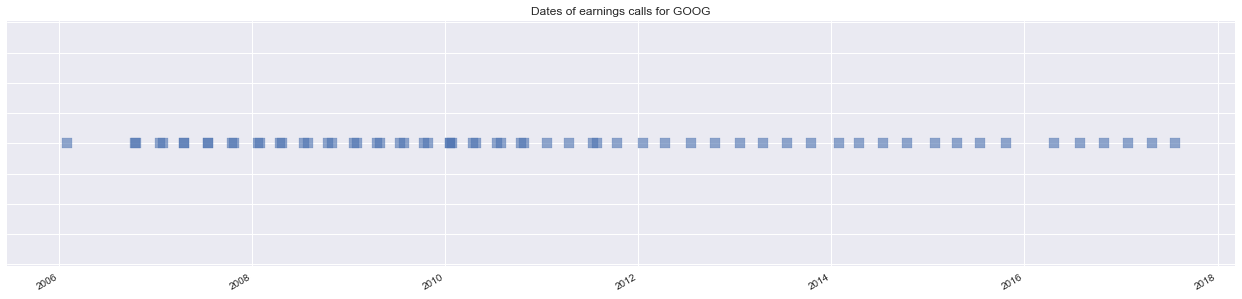

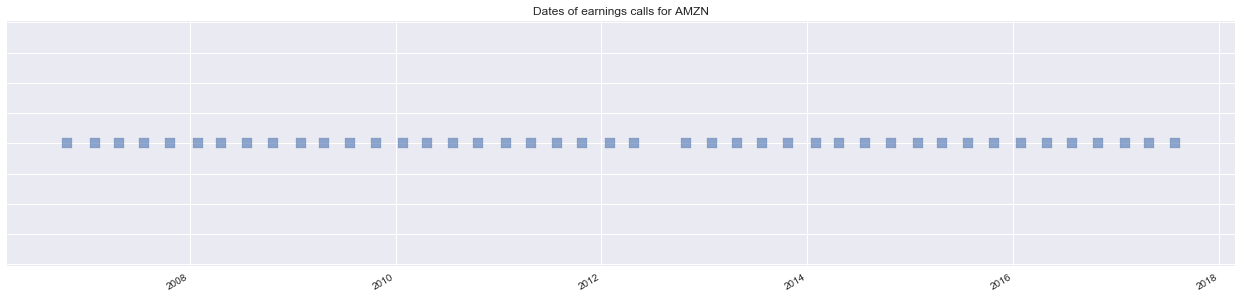

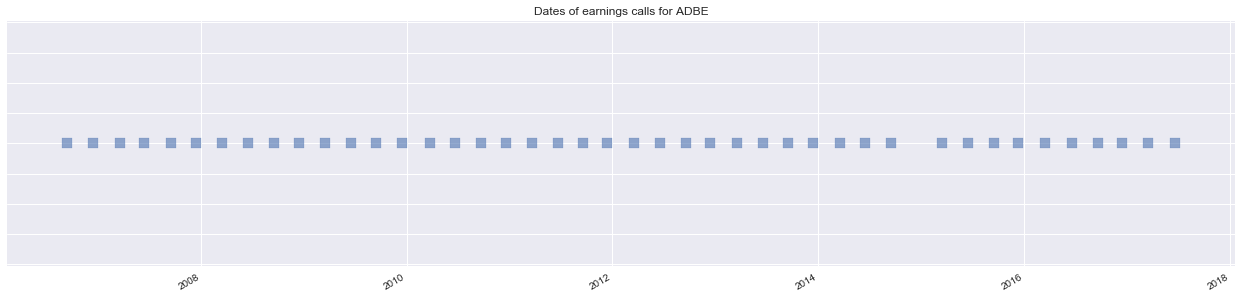

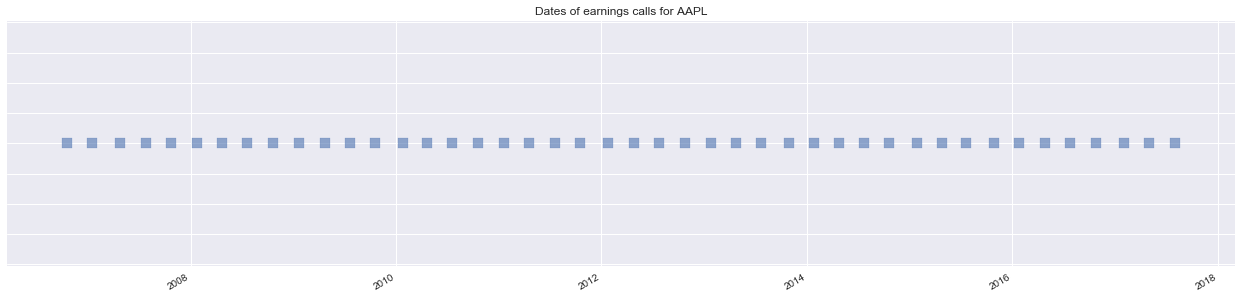

In [25]:
# Visualize transcript dates
def visualize_dates(transcripts):
    '''
    Plots the dates of a company's earning calls.
    
    Args:
        transcripts: A Pandas DataFrame containing a company's history of earnings calls.
    '''
    
    company = transcripts['company'][0]
    fig, ax = plt.subplots(figsize=(22,5))
    ax.scatter(transcripts.index, np.ones(len(transcripts.index)), marker = 's', alpha=0.6, s=100)
    fig.autofmt_xdate()
    ax.set_title("Dates of earnings calls for {}".format(company))
    ax.set_yticklabels([])

for company in transcript_samples:
    visualize_dates(company)

This code snippet performs the following actions:

The code defines a function called 'visualize_dates' that plots the dates of a company's earnings calls. The function takes a Pandas DataFrame containing the transcript data as an argument.

Within the function, the company name is extracted from the transcript data using 'transcripts['company'][0]'. This assumes that the 'company' column contains the name of the company and takes the value from the first row of the DataFrame.

A figure and axis object are created using 'plt.subplots(figsize=(22,5))', specifying the size of the figure.

The dates of the earnings calls are plotted using 'ax.scatter(transcripts.index, np.ones(len(transcripts.index)), marker='s', alpha=0.6, s=100)'. This creates a scatter plot with a square marker for each earnings call date.

The x-axis labels are formatted as dates using 'fig.autofmt_xdate()', which helps in proper visualization of the dates.

Title and y-axis labels are set for the plot.

The code then enters a loop that iterates over each company in the 'transcript_samples' list, which contains the selected transcript data for multiple companies.

Within the loop, the 'visualize_dates' function is called for each company's transcript data, generating a plot of the earnings call dates.

In summary, this code defines a function to visualize the dates of a company's earnings calls by plotting them as scatter points. The function is then called for each company's transcript data in the 'transcript_samples' list, producing separate plots for each company. This allows for a visual representation of the dates of earnings calls across different companies.

### Visualize loaded price data

2017-09-18 10:34:58,927 - DEBUG - Reading company prices for ALL
2017-09-18 10:34:58,932 - DEBUG - Reading company prices for CTL
2017-09-18 10:34:58,937 - DEBUG - Reading company prices for ABBV
2017-09-18 10:34:58,941 - DEBUG - Reading company prices for AMP
2017-09-18 10:34:58,945 - DEBUG - Reading company prices for AMG
2017-09-18 10:34:58,948 - DEBUG - Reading company prices for CMG
2017-09-18 10:34:58,951 - DEBUG - Reading company prices for HRB
2017-09-18 10:34:58,954 - DEBUG - Reading company prices for DRI
2017-09-18 10:34:58,957 - DEBUG - Reading company prices for DLTR
2017-09-18 10:34:58,960 - DEBUG - Reading company prices for CTAS
2017-09-18 10:34:58,964 - DEBUG - Reading company prices for CME
2017-09-18 10:34:58,967 - DEBUG - Reading company prices for C
2017-09-18 10:34:58,970 - DEBUG - Reading company prices for BCR
2017-09-18 10:34:58,974 - DEBUG - Reading company prices for ABC
2017-09-18 10:34:58,977 - DEBUG - Reading company prices for AON
2017-09-18 10:34:58,979 

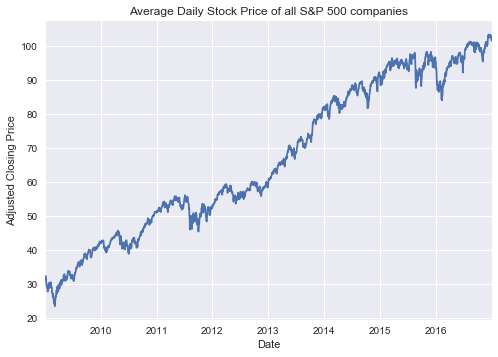

In [26]:
# Average value of all S&P 500 companies
all_companies = load_company_price_history(company_both, normalize=False)
all_companies.mean(axis=1).plot()
plt.xlabel('Date')
plt.ylabel('Adjusted Closing Price')
plt.title('Average Daily Stock Price of all S&P 500 companies')

This code snippet performs the following actions:

The code loads the price history data for all the companies in the 'company_both' list, which represents the companies that have both transcripts and price history available. The data is loaded into the 'all_companies' DataFrame.

The mean value is calculated along the rows (axis=1) of the 'all_companies' DataFrame using the mean() function. This calculates the average value of the stock prices for each date.

A line plot is then created using the calculated average values, plotting them against the dates.

The x-axis label is set as 'Date', representing the dates for which the stock prices are plotted.

The y-axis label is set as 'Adjusted Closing Price', indicating the stock price values being visualized.

The title of the plot is set as 'Average Daily Stock Price of all S&P 500 companies'.

In summary, this code calculates the average daily stock price across all S&P 500 companies by taking the mean of their respective stock prices for each date. It then visualizes this average daily stock price as a line plot, providing an overview of the collective trend of the stock prices for the S&P 500 companies over time.

2017-09-18 10:35:00,094 - DEBUG - Reading company prices for GOOG
2017-09-18 10:35:00,149 - INFO - Null values found after cleaning: False


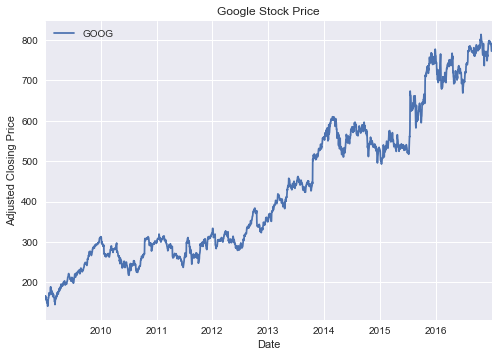

In [27]:
google_true_prices = load_company_price_history(['GOOG'])
google_true_prices.plot()
plt.xlabel('Date')
plt.ylabel('Adjusted Closing Price')
plt.title('Google Stock Price')

This code snippet performs the following actions:

The code loads the price history data specifically for the company with the ticker symbol 'GOOG', which represents Google, using the 'load_company_price_history' function. The data is loaded into the 'google_true_prices' DataFrame.

A line plot is then created using the 'google_true_prices' DataFrame, visualizing the adjusted closing prices of Google's stock over time.

The x-axis label is set as 'Date', indicating the dates for which the stock prices are plotted.

The y-axis label is set as 'Adjusted Closing Price', representing the values of the stock prices being visualized.

The title of the plot is set as 'Google Stock Price', providing a clear indication of the specific stock being visualized.

In summary, this code loads and plots the adjusted closing prices of Google's stock, providing a visual representation of the historical price trends for Google's stock over time.

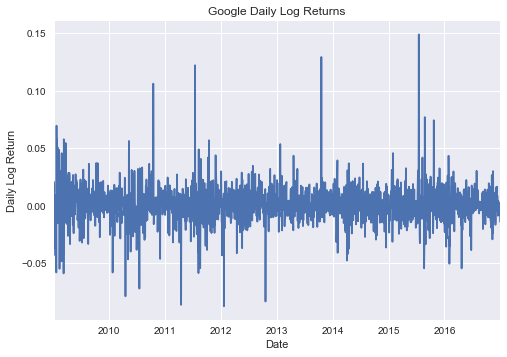

In [709]:
google_prices.plot()
plt.xlabel('Date')
plt.ylabel('Daily Log Return')
plt.title('Google Daily Log Returns')

This code snippet performs the following actions:

The code plots the daily log returns of Google's stock prices, which are represented by the 'google_prices' DataFrame.

A line plot is created to visualize the daily log returns over time.

The x-axis label is set as 'Date', indicating the dates for which the log returns are plotted.

The y-axis label is set as 'Daily Log Return', representing the values of the log returns being visualized.

The title of the plot is set as 'Google Daily Log Returns', providing a clear indication of the specific data being visualized.

In summary, this code plots the daily log returns of Google's stock prices, allowing for the examination of the relative changes in the stock's value on a daily basis. It provides a visual representation of the log return trends for Google's stock over time.

In [29]:
price_samples.head(10)

GOOG      AMZN      ADBE      AAPL
2009-01-02  0.020718 -0.005534  0.004767  0.041562
2009-01-05  0.020718 -0.005534  0.004767  0.041562
2009-01-06  0.018143  0.059253  0.046048 -0.016418
2009-01-07 -0.036745 -0.020430  0.000413 -0.022063
2009-01-08  0.009837  0.016938  0.002473  0.018293
2009-01-09 -0.031584 -0.029291 -0.011594 -0.022919
2009-01-12 -0.007590 -0.066859 -0.010467 -0.021086
2009-01-13  0.005173 -0.009094 -0.072426 -0.011111
2009-01-14 -0.043413 -0.059253 -0.045831 -0.027510
2009-01-15 -0.006540  0.059058 -0.013353 -0.023238

This code snippet performs the following action:

The code displays the first 10 rows of the 'price_samples' DataFrame, allowing us to inspect and view a portion of the price data for the selected companies.

By calling the 'head(10)' method on the DataFrame, it retrieves the first 10 rows, providing a glimpse of the data in a tabular format.

This allows us to examine the values, columns, and structure of the DataFrame, providing insights into the initial portion of the price data for the selected companies.

In summary, this code displays the first 10 rows of the 'price_samples' DataFrame, presenting a snapshot of the price data for the selected companies at the beginning of the dataset.

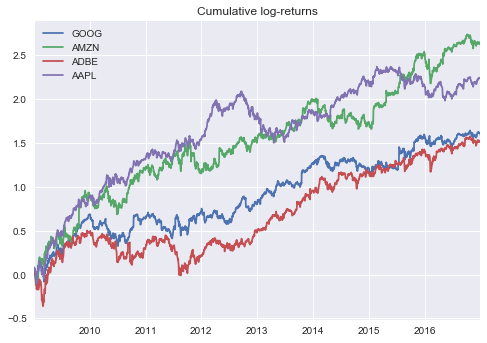

In [30]:
cum_returns = price_samples.cumsum()
cum_returns.plot()
plt.title('Cumulative log-returns')

This code snippet performs the following actions:

The code calculates the cumulative sum of the log returns for the selected companies' price data stored in the 'price_samples' DataFrame. This is done by calling the 'cumsum()' function on the DataFrame, resulting in a new DataFrame named 'cum_returns' containing the cumulative log returns.

A line plot is created using the 'cum_returns' DataFrame, visualizing the cumulative log returns over time.

The title of the plot is set as 'Cumulative log-returns', providing a clear indication of the data being visualized.

In summary, this code calculates the cumulative log returns for the selected companies' price data and creates a plot to visualize the cumulative log returns over time. It allows for the examination of the overall performance and trends of the selected companies' stock prices based on their cumulative log returns.

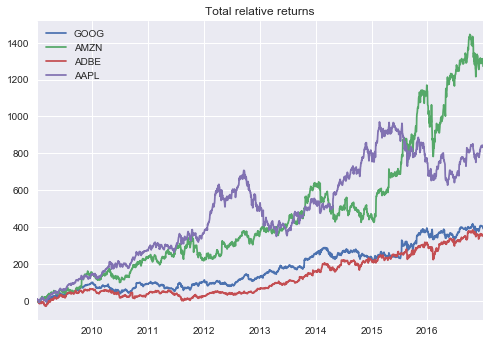

In [31]:
tot_rel_returns = 100*(np.exp(price_samples.cumsum()) - 1)
tot_rel_returns.plot()
plt.title('Total relative returns')

This code snippet performs the following actions:

The code calculates the total relative returns for the selected companies' price data stored in the 'price_samples' DataFrame. It does so by first calculating the cumulative sum of the log returns using 'price_samples.cumsum()', and then applying the exponential function 'np.exp()' to the cumulative sum. The resulting values represent the total relative returns.

The calculated total relative returns are then transformed by subtracting 1 and multiplying by 100 to express them as percentages. This is done by the expression '100*(np.exp(price_samples.cumsum()) - 1)', resulting in a new DataFrame named 'tot_rel_returns'.

A line plot is created using the 'tot_rel_returns' DataFrame, visualizing the total relative returns over time.

The title of the plot is set as 'Total relative returns', providing a clear indication of the data being visualized.

In summary, this code calculates the total relative returns for the selected companies' price data, expresses them as percentages, and creates a plot to visualize the total relative returns over time. It allows for the examination of the overall performance and growth of the selected companies' stock prices based on their total relative returns.

### Comparing price data with earnings call events

In [18]:
google_price_sample = load_company_price_history(['GOOG'])['2012':'2015']
google_returns_sample = load_company_price_history(['GOOG'], normalize=True)['2012':'2015']
google_transcript_sample = load_company_transcripts('GOOG')['2012':'2015']

2017-09-19 20:26:57,937 - DEBUG - Reading company prices for GOOG
2017-09-19 20:26:57,996 - INFO - Null values found after cleaning: False
2017-09-19 20:26:57,998 - DEBUG - Reading company prices for GOOG
2017-09-19 20:26:58,050 - INFO - Null values found after cleaning: False
2017-09-19 20:26:58,052 - DEBUG - Reading company transcripts for GOOG
2017-09-19 20:26:58,093 - WARNING - 1 duplicates removed from file


This code snippet performs the following actions:

The code loads a sample of price data, return data, and transcript data for the company with the ticker symbol 'GOOG' (Google) for the time period from 2012 to 2015.

The price data for 'GOOG' is loaded using the 'load_company_price_history' function, and only the data within the specified time range is extracted using the indexing operator ['2012':'2015']. The resulting DataFrame is assigned to the variable 'google_price_sample'.

Similarly, the return data for 'GOOG' is loaded using the 'load_company_price_history' function with the 'normalize' flag set to True to calculate the log-returns. Again, only the data within the specified time range is extracted, and the resulting DataFrame is assigned to the variable 'google_returns_sample'.

Lastly, the transcript data for 'GOOG' is loaded using the 'load_company_transcripts' function, and only the data within the specified time range is extracted. The resulting DataFrame is assigned to the variable 'google_transcript_sample'.

In summary, this code loads and extracts a sample of price data, return data, and transcript data for the company 'GOOG' during the time period from 2012 to 2015. These samples can be further analyzed or used for specific analysis tasks focusing on this specific company and time range.

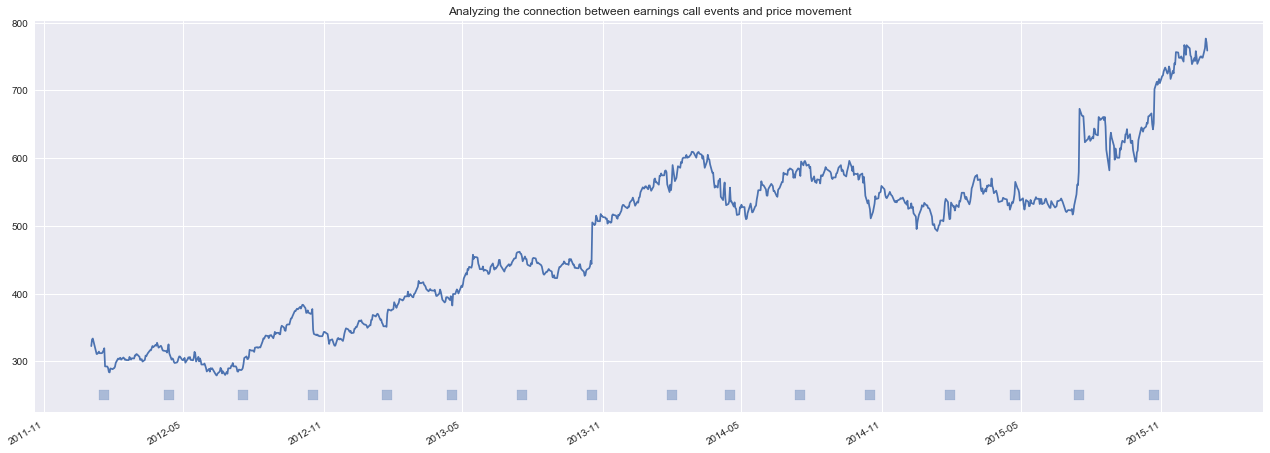

In [17]:
def plot_price_and_text(prices, transcripts):
    '''
    Plots the dates of a company's earning calls on top of a chart of the company's stock price.
    
    Args:
        prices: A Pandas DataFrame containing a company's price history. 
        transcripts: A Pandas DataFrame containing a company's history of earnings calls.
    '''
    # Plot the transcript events below the price, 10% offset from min price
    event_level = int(prices.min()*0.9) 
    fig, ax = plt.subplots(figsize=(22,8))
    ax.scatter(transcripts.index, event_level*np.ones(len(transcripts.index)), marker = 's', alpha=0.4, s=100)
    ax.plot(prices.index, prices)
    fig.autofmt_xdate()
    ax.set_title('Analyzing the connection between earnings call events and price movement')
    
plot_price_and_text(google_price_sample, google_transcript_sample)

This code snippet defines a function called 'plot_price_and_text' that visualizes the dates of a company's earnings calls on top of a chart of the company's stock price.

The function takes two arguments: 'prices', which is a Pandas DataFrame containing the price history of a company, and 'transcripts', which is a Pandas DataFrame containing the history of earnings calls for the same company.

Within the function, the minimum price from the 'prices' DataFrame is calculated and multiplied by 0.9 to set the level at which the transcript events will be plotted below the price chart. This helps to visually distinguish the transcript events from the price data.

A figure and axis object are created, specifying the size of the figure.

The transcript events are plotted as square markers ('marker='s'') at the respective dates of the earnings calls using 'ax.scatter(transcripts.index, event_level*np.ones(len(transcripts.index)), alpha=0.4, s=100)'.

The stock price is plotted as a line chart using 'ax.plot(prices.index, prices)'.

The x-axis labels are formatted as dates using 'fig.autofmt_xdate()', ensuring proper visualization of the dates.

The title of the plot is set as 'Analyzing the connection between earnings call events and price movement', indicating the purpose of the visualization.

Overall, the 'plot_price_and_text' function combines the price history and earnings call data to visualize the dates of the earnings calls on top of the company's stock price chart. This helps to analyze and understand the potential connection between earnings call events and price movement. Finally, the function is called with the 'google_price_sample' and 'google_transcript_sample' data to generate the plot for the company 'GOOG' (Google).

### Explore connection between text events and returns

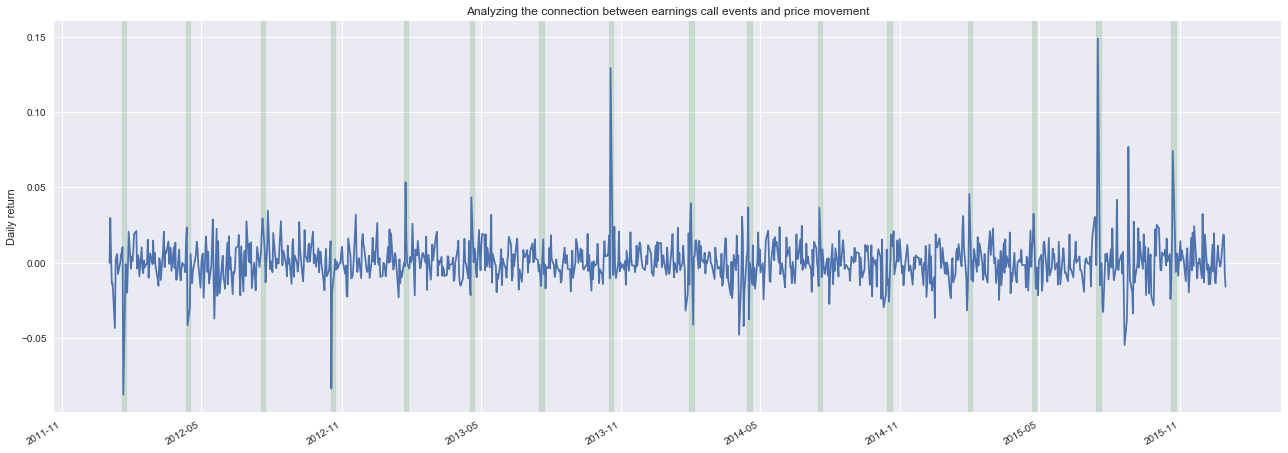

In [708]:
def plot_returns_and_text(returns, transcripts):
    '''
    Plots the dates of a company's earning calls on top of a chart of the company's daily returns.
    
    Args:
        prices: A Pandas DataFrame containing a company's price history. 
        transcripts: A Pandas DataFrame containing a company's history of earnings calls.
    '''
    # Plot the transcript events below the price, 10% offset from min price
    event_level = int(returns.min()*0.9) 
    fig, ax = plt.subplots(figsize=(22,8))
    #ax.scatter(transcripts.index, 0.1*np.ones(len(transcripts.index)), marker = 's', alpha=0.4, s=100)
    ax.plot(returns.index, returns)
    for date in transcripts.index:
        ax.axvspan(date - pd.to_timedelta('1 days'), date + pd.to_timedelta('6 days'), color='green', alpha=0.15)
    fig.autofmt_xdate()
    ax.set_title('Analyzing the connection between earnings call events and price movement')
    ax.set_ylabel('Daily return')

plot_returns_and_text(google_returns_sample, google_transcript_sample)

This code snippet defines a function called 'plot_returns_and_text' that visualizes the dates of a company's earnings calls on top of a chart of the company's daily returns.

The function takes two arguments: 'returns', which is a Pandas DataFrame containing the daily returns of a company, and 'transcripts', which is a Pandas DataFrame containing the history of earnings calls for the same company.

Within the function, the minimum return value from the 'returns' DataFrame is calculated and multiplied by 0.9 to set the level at which the transcript events will be plotted below the returns chart. This helps to visually distinguish the transcript events from the returns data.

A figure and axis object are created, specifying the size of the figure.

The returns are plotted as a line chart using 'ax.plot(returns.index, returns)'.

For each date in the 'transcripts' index, a green shaded area is added to the plot using 'ax.axvspan(date - pd.to_timedelta('1 days'), date + pd.to_timedelta('6 days'), color='green', alpha=0.15)'. This highlights the date of the earnings call and the subsequent six days.

The x-axis labels are formatted as dates using 'fig.autofmt_xdate()', ensuring proper visualization of the dates.

The title of the plot is set as 'Analyzing the connection between earnings call events and price movement', indicating the purpose of the visualization.

The y-axis label is set as 'Daily return', representing the values of the daily returns being visualized.

Overall, the 'plot_returns_and_text' function combines the daily returns and earnings call data to visualize the dates of the earnings calls on top of the company's daily returns chart. This helps to analyze and understand the potential connection between earnings call events and the corresponding price movement. Finally, the function is called with the 'google_returns_sample' and 'google_transcript_sample' data to generate the plot for the company 'GOOG' (Google).

2017-09-22 09:03:46,754 - DEBUG - Reading company prices for CMG
2017-09-22 09:03:46,809 - INFO - Null values found after cleaning: False
2017-09-22 09:03:46,815 - DEBUG - Reading company transcripts for CMG
2017-09-22 09:03:46,907 - WARNING - 1 duplicates removed from file


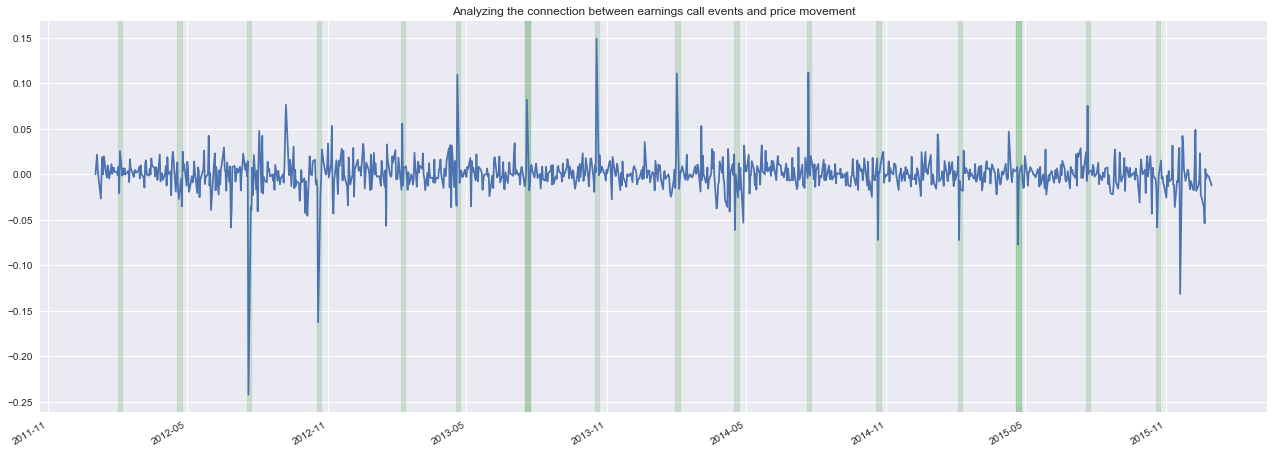

In [705]:
plot_returns_and_text(load_company_price_history(['CMG'], normalize=True)['2012':'2015'],
                      load_company_transcripts('CMG')['2012':'2015'])

This code snippet performs the following actions:

The code calls the 'plot_returns_and_text' function to visualize the dates of earnings calls on top of a chart of the daily returns for the company with the ticker symbol 'CMG' (Chipotle Mexican Grill).

To generate the required data for plotting, the 'load_company_price_history' function is called with the argument ['CMG'], normalize=True, and the time range '2012':'2015'. This retrieves the price history data for 'CMG' during the specified period and normalizes it to calculate the daily returns. The resulting DataFrame containing the normalized daily returns is then passed as the first argument to the 'plot_returns_and_text' function.

Similarly, the 'load_company_transcripts' function is called with the argument 'CMG' to retrieve the transcript data for 'CMG'. The function is also limited to the time range '2012':'2015'. The resulting DataFrame containing the transcript data for the specified period is passed as the second argument to the 'plot_returns_and_text' function.

The 'plot_returns_and_text' function is then executed with the provided data, generating a plot that visualizes the dates of the earnings calls on top of the chart representing the daily returns of 'CMG' stock during the given time period.

In summary, this code generates a visualization that combines the dates of earnings calls and the daily returns for the company 'CMG' (Chipotle Mexican Grill) during the time range from 2012 to 2015. The plot helps to analyze and explore the potential relationship between the earnings call events and the corresponding daily returns of the company's stock.

Clearly, we can see some examples of large price movements surrounding the time of quarterly earnings calls. The goal of this project is to develop an algorithm capable of learning the price movements associated with the content of an earnings call.

For this project, pretrained word embeddings will be used. Specifically, the GloVe (Global Vectors for Word Representation) embeddings will be utilized. These embeddings are created by factorizing a matrix of word co-occurrence statistics. The GloVe embeddings offer vector representations for 400K English words in dimensions of 50, 100, 200, and 300. The GloVe embeddings data can be downloaded, with a file size of 822MB.

Additionally, Facebook's FastText embeddings were considered for comparison. However, due to their larger file size of 9 GB, it is not feasible to use them on the local machine for this project. Therefore, the focus will remain on the GloVe embeddings.

In [10]:
with open('glove.6B/glove.6B.50d.txt') as words:
    w2v = {word.split()[0]: np.vectorize(lambda x: float(x))(word.split()[1:]) for word in words}

logging.info('{} words in word2vec dictionary.'.format(len(w2v)))

# We'll later reduce the dimensionality from 50 to 2, let's go ahead and fit the entire corpus
# I've opted to use PCA over t-SNE given that we can fit the transformer once and have deterministic results
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
reduced_embeddings = pca.fit_transform(list(w2v.values()))
w2v_reduced = dict(zip(list(w2v.keys()), reduced_embeddings.tolist()))

2017-10-04 09:55:50,937 - INFO - 400000 words in word2vec dictionary.


This code snippet performs the following actions:

The code opens the file named 'glove.6B/glove.6B.50d.txt', which contains the pretrained GloVe word embeddings. These embeddings represent words as vectors in a high-dimensional space.

The word embeddings are processed and stored in a dictionary named 'w2v'. Each word in the embeddings file is split into its components, where the first element represents the word itself, and the remaining elements correspond to the vector values for that word. The vector values are converted to floating-point numbers and associated with the word in the 'w2v' dictionary.

The number of words in the 'w2v' dictionary is logged using the 'logging.info()' function, providing information about the size of the word-to-vector dictionary. This helps in understanding the extent of the word embeddings available in the GloVe dataset.

Next, the code prepares for dimensionality reduction of the word embeddings. The goal is to reduce the dimensionality from 50 to 2 for visualization purposes. The 'PCA' (Principal Component Analysis) algorithm is chosen for this task. An instance of the 'PCA' class is created with the parameter 'n_components' set to 2, indicating that the resulting vectors will have two dimensions.

The 'fit_transform()' method of the 'PCA' object is then applied to the list of word embeddings in 'w2v.values()'. This process performs dimensionality reduction, transforming the high-dimensional word vectors into two-dimensional vectors. The resulting reduced embeddings are stored in the 'reduced_embeddings' variable.

To facilitate further use and mapping between words and their reduced embeddings, a new dictionary named 'w2v_reduced' is created. The words from the 'w2v' dictionary are used as keys, and the corresponding reduced embedding vectors are converted to lists and associated with the words in the 'w2v_reduced' dictionary.

In summary, this code loads the pretrained GloVe word embeddings, converts them into a word-to-vector dictionary ('w2v'), and logs the number of words in the dictionary. It then applies dimensionality reduction using PCA to obtain reduced embeddings in two dimensions. Finally, the reduced embeddings are stored in a new dictionary ('w2v_reduced') for further use.

In the previous steps, we have created a dictionary that maps words in our vocabulary to their corresponding vector representations. The keys in the dictionary represent the words, and the values are the vectors that capture the semantic meaning of each word.

To access the vector representation of a word, we can simply query the dictionary using the word as the key. This allows us to retrieve the 50-dimensional vector representation associated with that word.

Additionally, we have performed a projection of the 50-dimensional vectors into a 2-dimensional space. This transformation allows for easier visualization of the word embeddings. By reducing the dimensions from 50 to 2, we can plot the word embeddings in a 2D graph, which provides a more intuitive and compact representation of the semantic relationships between words.

In [11]:
w2v['example']

array([ 0.51564  ,  0.56912  , -0.19759  ,  0.0080456,  0.41697  ,
        0.59502  , -0.053312 , -0.83222  , -0.21715  ,  0.31045  ,
        0.09352  ,  0.35323  ,  0.28151  , -0.35308  ,  0.23496  ,
        0.04429  ,  0.017109 ,  0.0063749, -0.01662  , -0.69576  ,
        0.019819 , -0.52746  , -0.14011  ,  0.21962  ,  0.13692  ,
       -1.2683   , -0.89416  , -0.1831   ,  0.23343  , -0.058254 ,
        3.2481   , -0.48794  , -0.01207  , -0.81645  ,  0.21182  ,
       -0.17837  , -0.02874  ,  0.099358 , -0.14944  ,  0.2601   ,
        0.18919  ,  0.15022  ,  0.18278  ,  0.50052  , -0.025532 ,
        0.24671  ,  0.10596  ,  0.13612  ,  0.0090427,  0.39962  ])

This code snippet retrieves the vector representation of the word 'example' from the dictionary 'w2v'. 

The variable 'w2v' represents a dictionary where the keys are words in our vocabulary, and the values are the corresponding vector representations of those words. 

By using 'w2v['example']', we can access the vector representation associated with the word 'example'. This allows us to retrieve the specific vector that captures the semantic meaning or contextual information of the word 'example' as represented in the pretrained word embeddings. 

The vector representation provides a numerical representation of the word's features or characteristics, allowing for various applications such as similarity comparisons, semantic analysis, and language modeling.

In [12]:
w2v_reduced['example']

[4.092878121172412, 1.785939893037579]

This code snippet retrieves the reduced vector representation of the word 'example' from the dictionary 'w2v_reduced'. 

The variable 'w2v_reduced' represents a dictionary where the keys are words in our vocabulary, and the values are the reduced vector representations of those words. These reduced embeddings were obtained by applying dimensionality reduction techniques, such as PCA, to the original word embeddings.

By using 'w2v_reduced['example']', we can access the reduced vector representation associated with the word 'example'. This reduced vector captures the semantic meaning or contextual information of the word 'example' in a lower-dimensional space, typically 2-dimensional in this case.

The reduced vector representation allows for easier visualization and analysis of the word embeddings. It provides a compressed representation of the original high-dimensional word embeddings, while still preserving important semantic relationships and similarities between words. This reduced representation can be useful for tasks such as visualization on a 2D graph, clustering, or other analyses that benefit from a lower-dimensional representation of the word embeddings.

In [14]:
# Sample transcripts from collection
sample_text_google = google_transcripts['body'][5]
sample_text_amazon = amazon_transcripts['body'][5]
sample_text_adobe = adobe_transcripts['body'][5]

This code snippet selects a sample of text from the transcripts of different companies.

The variable 'sample_text_google' contains a sample of text taken from the body of the transcript for Google. It represents a specific portion of the transcript, likely the text from the 5th entry in the 'body' column of the Google transcripts DataFrame.

Similarly, 'sample_text_amazon' contains a sample of text taken from the body of the transcript for Amazon, specifically the 5th entry in the 'body' column of the Amazon transcripts DataFrame.

Likewise, 'sample_text_adobe' contains a sample of text taken from the body of the transcript for Adobe, representing the 5th entry in the 'body' column of the Adobe transcripts DataFrame.

These samples of text can be used for further analysis, processing, or any other relevant tasks that involve working with specific portions of the transcripts for each company.

Let's see what words were ignored when we translate the transcripts to word embeddings. 

In [15]:
from keras.preprocessing.text import text_to_word_sequence

not_in_vocab = set([word for word in text_to_word_sequence(sample_text_google) if word not in w2v])
print('  --  '.join(not_in_vocab))

motofone  --  segment's  --  we're  --  ml910  --  here's  --  we've  --  doesn't  --  didn't  --  ed's  --  z6  --  asp's  --  vhub  --  p2k  --  weren't  --  you're  --  3gq  --  i'll  --  ray's  --  wasn't  --  they're  --  what's  --  i'd  --  motowi4  --  world's  --  embracement  --  downish  --  broadbus  --  hereon  --  devices'  --  shippable  --  w355  --  motorola's  --  w205  --  that’s  --  isn't  --  morning's  --  mw810  --  wimax's  --  that's  --  wouldn't  --  ounjian  --  let's  --  w215  --  dan's  --  motoming  --  organization's  --  krzr  --  reprioritizing  --  w510  --  mc50  --  greg's  --  today's  --  mc70  --  terry's  --  we'll  --  company's  --  don't  --  5ish  --  haven't  --  kvaal  --  you've  --  you'll  --  can't  --  nottenburg  --  motorokr  --  what’s  --  mc35  --  i've  --  metlitsky  --  there's  --  july's  --  w370  --  i'm  --  it's  --  motorizr


This code snippet performs the following actions:

The code imports the 'text_to_word_sequence' function from the Keras library. This function is used for tokenizing a given text into a sequence of words. 

The 'sample_text_google' variable represents a sample of text from the Google transcripts. This text is passed as input to the 'text_to_word_sequence' function.

The 'text_to_word_sequence' function tokenizes the sample text by splitting it into individual words, removing punctuation and converting everything to lowercase.

The resulting sequence of words is then processed further to identify words that are not present in the 'w2v' dictionary. These words are checked against the 'w2v' dictionary to determine if they are part of the pretrained word embeddings vocabulary. If a word from the sequence is not found in the 'w2v' dictionary, it is added to the 'not_in_vocab' set.

The 'not_in_vocab' set contains the words from the sample text that are not present in the pretrained word embeddings vocabulary.

Finally, the code prints the words in the 'not_in_vocab' set, separated by '  --  ' as a delimiter. This displays the words from the sample text that are not included in the pretrained word embeddings vocabulary.

As you can see, our word embeddings dictionary doesn't support conjunctions. However, this should be alright seeing as most of them would likely be considered stopwords anyways.

A note on stopwords, these are words that are very commonly used and their presence does little to convey a unique signature of a body of text. They're useful in everyday conversations, but when you're identifying text based on the frequency of words used, they're next to useless. 

### TF-IDF weighting

In [16]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer

def get_tfidf_values(documents, norm=None):
    ''' 
    Transforms a collection of text documents into a collection of dictionaries mapping words to TFIDF values.
    
    Args:
        documents: An iterable which yields either str, unicode or file objects.
        norm: ‘l1’, ‘l2’ or None. Norm used to normalize term vectors. None for no normalization.
        
    Returns:
        A list of dictionaries containing mappings from words to TF-IDF scores for each document.
    '''
    count_vec = CountVectorizer()
    counts = count_vec.fit_transform(documents)
    words = np.array(count_vec.get_feature_names())
    
    transformer = TfidfTransformer(norm=norm)
    tfidf = transformer.fit_transform(counts)
    tfidf_arr = tfidf.toarray()
    
    tfidf_documents = []
    for i in range(len(documents)):
        tfidf_doc = {}
        for word, tfidf in zip(words[np.nonzero(tfidf_arr[i, :])], tfidf_arr[i, :][np.nonzero(tfidf_arr[i, :])]):
            tfidf_doc[word] = tfidf
        tfidf_documents.append(tfidf_doc)
    return tfidf_documents

This code snippet provides a function called 'get_tfidf_values' that transforms a collection of text documents into a collection of dictionaries. These dictionaries map words to their corresponding TF-IDF (Term Frequency-Inverse Document Frequency) values.

The function takes two arguments: 'documents' and 'norm'. 'documents' is an iterable object that contains the text documents to be transformed, and 'norm' specifies the normalization method for the term vectors. It can be set to 'l1', 'l2', or 'None' for no normalization.

Within the function, the 'CountVectorizer' class from scikit-learn is used to convert the text documents into a matrix of token counts. The 'fit_transform' method of 'CountVectorizer' is applied to the 'documents', producing the counts matrix.

The words in the vocabulary are obtained using the 'get_feature_names' method of 'CountVectorizer'. These words are stored in a numpy array named 'words'.

Next, the 'TfidfTransformer' class is used to calculate the TF-IDF values from the counts matrix. The 'fit_transform' method of 'TfidfTransformer' is applied to the counts matrix, resulting in the TF-IDF matrix.

The TF-IDF matrix is then converted to a numpy array using the 'toarray' method, stored in the 'tfidf_arr' variable.

To create the final output, a list named 'tfidf_documents' is initialized. It iterates over the range of document indices, and for each document, it creates a dictionary named 'tfidf_doc'. This dictionary maps words (obtained from 'words') to their respective TF-IDF scores (obtained from 'tfidf_arr'). The non-zero elements in 'tfidf_arr' are paired with the corresponding words, and these pairs are added to 'tfidf_doc'. Finally, 'tfidf_doc' is appended to the 'tfidf_documents' list.

The function returns the 'tfidf_documents' list, which contains a dictionary of words and their TF-IDF values for each document in the input collection.

In [17]:
def docs_to_3D(tfidf_documents, w2v_reduced):
    '''
    Transforms a list of dictionaries (word:tf-idf score) into a list of Pandas DataFrames containing
    word embedding dimensions (2) and TF-IDF score. 
    
    Args:
        tfidf_documents: A list of dictionaries containing mappings from words to TF-IDF scores for each document.
        w2v_reduced: A dictionary mapping words to their 2D embedding. 
        
    Returns:
        A list of DataFrames where each DataFrame contains the vocabulary and its features of a transcript.
    '''
    text_docs_3D = []
    
    for i, doc in enumerate(tfidf_documents): # list of documents with word:tfidf
        data = []
        for k, v in tfidf_documents[i].items():
            try:
                item = w2v_reduced[k][:] # Copy values from reduced embedding dictionary
                item.append(v) # Append the TFIDF score
                item.append(k) # Append the word
                data.append(item) # Add [dim1, dim2, tfidf, word] to collection
            except: # If word not in embeddings dictionary
                continue 

        df = pd.DataFrame(data, columns=['dim1', 'dim2', 'tfidf', 'word'])
        df = df.set_index(['word'])

        text_docs_3D.append(df)
        
    return text_docs_3D

This code snippet provides a function called 'docs_to_3D' that transforms a list of dictionaries (word: TF-IDF score) into a list of Pandas DataFrames. Each DataFrame represents the word embedding dimensions (2D) along with the corresponding TF-IDF score for each word.

The function takes two arguments: 'tfidf_documents' and 'w2v_reduced'. 'tfidf_documents' is a list of dictionaries where each dictionary contains mappings from words to their TF-IDF scores for a particular document. 'w2v_reduced' is a dictionary that maps words to their 2D embedding representation.

Within the function, an empty list named 'text_docs_3D' is initialized to store the resulting DataFrames.

The function then iterates over each document in 'tfidf_documents' using the 'enumerate' function. For each document, it creates an empty list called 'data' to store the transformed data.

For each word (key) and its corresponding TF-IDF score (value) in the current document, the function attempts to retrieve the 2D embedding representation of the word from the 'w2v_reduced' dictionary. If the word is found in 'w2v_reduced', the function creates a list 'item' that contains the two dimensions of the reduced embedding, the TF-IDF score, and the word itself. This list is appended to the 'data' list.

If the word is not found in the 'w2v_reduced' dictionary, the function continues to the next word.

Once all words in the document have been processed, the 'data' list is used to create a Pandas DataFrame named 'df' with columns 'dim1', 'dim2', 'tfidf', and 'word'. The 'word' column is set as the index of the DataFrame.

The resulting DataFrame 'df' represents the word embedding dimensions (2D) along with the corresponding TF-IDF scores for the words in the document.

Finally, the 'df' DataFrame is appended to the 'text_docs_3D' list. This process is repeated for each document in 'tfidf_documents'.

The function returns the 'text_docs_3D' list, which contains a DataFrame for each document. Each DataFrame represents the word embedding dimensions (2D) and TF-IDF scores for the words in the corresponding document.

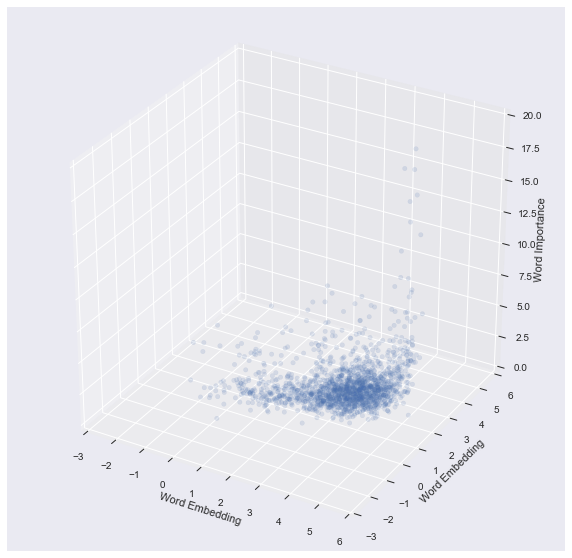

In [18]:
from mpl_toolkits.mplot3d import Axes3D

tfidf_docs = get_tfidf_values(google_transcripts['body'])
text_docs_3D = docs_to_3D(tfidf_docs, w2v_reduced)

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
ax.set_xlim([-3, 6])
ax.set_ylim([-3, 6])
ax.set_zlim([0, 20])
ax.set_xlabel('Word Embedding')
ax.set_ylabel('Word Embedding')
ax.set_zlabel('Word Importance')

text = text_docs_3D[0]
scatter = ax.scatter(text['dim1'], text['dim2'], text['tfidf'].apply(np.sqrt), alpha=0.15,
                     zdir='z', s=20, c=None, depthshade=True)

This code snippet generates a 3D scatter plot to visualize the relationship between word embeddings, word embeddings, and word importance for a particular document.

First, the 'get_tfidf_values' function is called with the 'google_transcripts['body']' as the input to obtain the TF-IDF values for the text documents. The resulting TF-IDF values are stored in the 'tfidf_docs' variable.

Then, the 'docs_to_3D' function is called with the 'tfidf_docs' and 'w2v_reduced' as inputs to transform the TF-IDF values and word embeddings into a list of Pandas DataFrames. The resulting DataFrames, representing the 3D coordinates of word embeddings along with the corresponding TF-IDF scores, are stored in the 'text_docs_3D' variable.

Next, a figure object 'fig' is created with a size of 10x10 inches. An Axes3D object 'ax' is added to the figure as a subplot with the projection set to '3d'. The x, y, and z limits of the plot are set using the 'set_xlim', 'set_ylim', and 'set_zlim' methods, respectively. Labels for the x, y, and z axes are set using the 'set_xlabel', 'set_ylabel', and 'set_zlabel' methods.

The 'text_docs_3D' list contains DataFrames for each document. In this code snippet, the first DataFrame from the list, denoted as 'text', is selected for plotting.

The scatter plot is created using the 'scatter' method of the 'ax' object. The 'dim1', 'dim2', and 'tfidf' columns of the 'text' DataFrame are used as the x, y, and z coordinates, respectively. The 'tfidf' values are square-rooted to provide a better visual representation. The 'alpha' parameter controls the transparency of the markers, the 'zdir' parameter sets the direction of the markers' depth shading, the 's' parameter controls the size of the markers, and the 'c' parameter specifies the color of the markers. In this case, the 'c' parameter is set to 'None', indicating that the markers will not have a specific color.

Overall, the code generates a 3D scatter plot with the word embeddings plotted in the x and y dimensions, the word importance (TF-IDF scores) represented by the marker size, and the depth shading indicating the marker's position in the z dimension.

(array([ 911.,  679.,   88.,   15.,   12.,    3.,    2.,    1.,    2.,    2.]),
 array([  0.,   2.,   4.,   6.,   8.,  10.,  12.,  14.,  16.,  18.,  20.]),
 <a list of 10 Patch objects>)

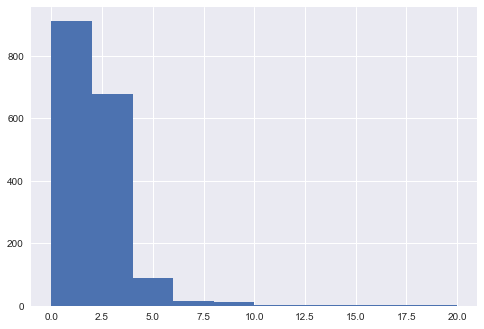

In [113]:
plt.hist(text_docs_3D[0]['tfidf'].apply(np.sqrt), range=(0,20))

This code generates a histogram to visualize the distribution of TF-IDF scores for a specific document in the 'text_docs_3D' list.

The 'text_docs_3D[0]' selects the first DataFrame from the 'text_docs_3D' list, representing a particular document's word embeddings and TF-IDF scores.

The 'hist' function from the 'plt' module is called with the 'tfidf' column of the selected DataFrame as the input. The 'apply(np.sqrt)' method is used to apply the square root function to each value in the 'tfidf' column before plotting the histogram.

The 'range' parameter is set to (0, 20), indicating that the histogram will span the range of TF-IDF scores from 0 to 20.

Overall, the code generates a histogram that illustrates the distribution of TF-IDF scores for the selected document. The x-axis represents the TF-IDF score range, and the y-axis represents the frequency or count of TF-IDF scores falling within each bin of the histogram.

Evolution of company transcripts over time.

Enhancement: rather than providing a list of word embedding vectors to plot, pass a dictionary of word:vector pairs so that user can hover mouse over points to see what words are. 

In [19]:
from matplotlib import rc
# equivalent to rcParams['animation.html'] = 'html5'
rc('animation', html='html5')

This code snippet sets a configuration option in matplotlib to enable HTML5 rendering for animations.

The 'rc' function from the 'matplotlib' library is used to modify the configuration settings. The first argument 'animation' specifies the category of the configuration option to be modified. The second argument 'html' specifies the specific subcategory to be modified within the 'animation' category. The value 'html5' is assigned to this subcategory.

Setting 'html' to 'html5' means that when creating an animation with matplotlib, the resulting animation will be rendered as an HTML5 video. This allows the animation to be embedded and played directly in a web browser.

By modifying this configuration option, the code ensures that any subsequent animations created using matplotlib will be compatible with HTML5 rendering.

In [20]:
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


def animate_company_transcripts_3D(vis_docs):
    '''Accepts a reduced (2D) vector representation of a collection of
    text documents with TDIDF scores and animates the visual evolution of text over time.
    
    Optional: include date labels in plot.
    '''
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.set_xlim([-3, 6])
    ax.set_ylim([-3, 6])
    ax.set_zlim([0, 20])
    ax.set_xlabel('Word Embedding')
    ax.set_ylabel('Word Embedding')
    ax.set_zlabel('Word Importance')

    text = vis_docs[0]
    scatter = ax.scatter(text['dim1'], text['dim2'], text['tfidf'], alpha=0.1, 
                         zdir='z', s=20, c=None, depthshade=True, animated=True)

    def update(frame_number):
        text = vis_docs[frame_number]
        scatter._offsets3d = (text['dim1'], text['dim2'], text['tfidf'].apply(np.sqrt))
        return scatter

    return FuncAnimation(fig, update, frames=len(vis_docs), interval=300, repeat=True)

This code defines a function called 'animate_company_transcripts_3D' that takes a reduced (2D) vector representation of a collection of text documents with TF-IDF scores as input. The function generates an animation that visualizes the evolution of text over time.

Inside the function, a figure object 'fig' and a subplot with 3D projection 'ax' are created. The x, y, and z limits of the plot are set using the 'set_xlim', 'set_ylim', and 'set_zlim' methods, respectively. Labels for the x, y, and z axes are set using the 'set_xlabel', 'set_ylabel', and 'set_zlabel' methods.

The first DataFrame from the 'vis_docs' list, denoted as 'text', is selected for initial plotting. A scatter plot is created using the 'scatter' method of the 'ax' object. The 'dim1', 'dim2', and 'tfidf' columns of the 'text' DataFrame are used as the x, y, and z coordinates, respectively. The 'tfidf' values are applied with the square root function to provide a better visual representation. The 'alpha' parameter controls the transparency of the markers, the 'zdir' parameter sets the direction of the markers' depth shading, the 's' parameter controls the size of the markers, and the 'c' parameter specifies the color of the markers. In this case, the 'c' parameter is set to 'None', indicating that the markers will not have a specific color.

The 'update' function is defined inside 'animate_company_transcripts_3D' to update the scatter plot for each frame of the animation. It takes a 'frame_number' as input, which represents the current frame being rendered. Within 'update', the 'text' DataFrame corresponding to the current frame is selected, and the scatter plot is updated with the new coordinates and sizes based on the 'dim1', 'dim2', and 'tfidf' columns.

The 'FuncAnimation' class from the 'matplotlib.animation' module is used to create the animation. It takes the 'fig', 'update' function, the number of frames in 'vis_docs', the interval between frames in milliseconds, and the 'repeat' parameter as inputs. The resulting animation is returned by the function.

The 'animate_company_transcripts_3D' function can be used to create an animated visualization of the text evolution over time, with each frame showing the positions and sizes of the text markers based on the 'dim1', 'dim2', and 'tfidf' values.

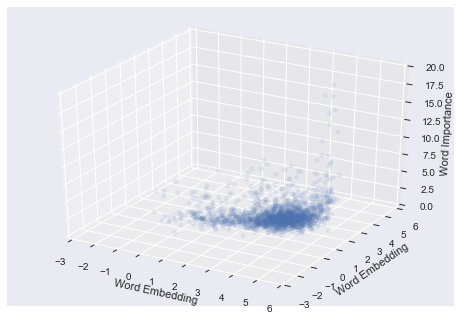

In [21]:
tfidf_docs = get_tfidf_values(google_transcripts['body'])
text_docs_3D = docs_to_3D(tfidf_docs, w2v_reduced)
animate_company_transcripts_3D(text_docs_3D)

This code snippet performs a series of steps. First, it calculates the TF-IDF (Term Frequency-Inverse Document Frequency) values for the documents in the 'google_transcripts' dataset by calling the 'get_tfidf_values' function. TF-IDF represents the importance of each word in the documents relative to the entire corpus.

Next, the 'docs_to_3D' function is invoked with the TF-IDF values and the reduced word embeddings ('w2v_reduced') as inputs. This function transforms the TF-IDF values into structured Pandas DataFrames that contain the word embedding dimensions (2D) and the corresponding TF-IDF scores.

Finally, the 'animate_company_transcripts_3D' function is called with the transformed dataframes ('text_docs_3D') as input. This function generates an animated visualization that illustrates the evolution of text over time. The animation plots the text markers in a 3D space, where the x and y coordinates represent the reduced word embeddings, and the size of the markers corresponds to the TF-IDF scores. As the animation progresses, the text markers move and change size, providing a dynamic representation of the text's characteristics and variations throughout the analyzed period.

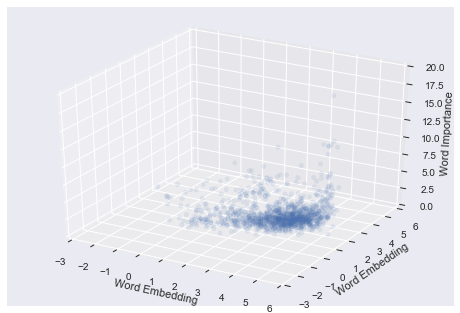

In [22]:
tfidf_docs = get_tfidf_values(apple_transcripts['body'])
text_docs_3D = docs_to_3D(tfidf_docs, w2v_reduced)
animate_company_transcripts_3D(text_docs_3D)

This code snippet performs a series of steps. First, it calculates the TF-IDF (Term Frequency-Inverse Document Frequency) values for the documents in the 'apple_transcripts' dataset. TF-IDF represents the importance of each word in the documents relative to the entire collection. These TF-IDF values are computed using the 'get_tfidf_values' function.

Next, the TF-IDF values are passed to the 'docs_to_3D' function along with the reduced word embeddings ('w2v_reduced'). This function transforms the TF-IDF values and word embeddings into structured Pandas DataFrames. The resulting DataFrames organize the data in a format suitable for visualization, with the word embedding dimensions (2D) and the corresponding TF-IDF scores.

Finally, the 'animate_company_transcripts_3D' function is called with the transformed DataFrames as input. This function generates an animated visualization that showcases the evolution of text over time. The animation is displayed in a 3D plot, where the x and y coordinates represent the reduced word embeddings, and the size of the markers corresponds to the TF-IDF scores. As the animation progresses, the markers representing the text data move and change in size, providing a dynamic and visual representation of the text's characteristics and variations throughout the analyzed period.

### Digitize input space for ConvNet

In [502]:
def digitize_embedding_space(text_docs_3D, index, bins=250):
    '''
    Accepts a list of DataFrames where each DataFrame contains the vocabulary and its features of a transcript,
    binning each DataFrame vocabulary into a 2D array, where the bin values correspond with the sum of TF-IDF
    weights for all words assigned to the bin. 
    
    Args:
        text_docs_3D: A list of DataFrames where each DataFrame contains the vocabulary and its features of a 
        transcript.
        index: The index of the original transcripts DataFrame where index values correspond with the dates
        of the earnings call. These dates are important to preserve. 
        bins: Defines the dimensions of the 2D array used as input into the ConvNet feature extractor. 
        
    Returns:
        text_docs: A list of 2D arrays, ready for input. 
        lookup: A Pandas Series mapping the `text_docs` list indicies to their corresponding dates. 
    '''
    
    binned_docs = []
    for frame, data in enumerate(text_docs_3D):
        doc = text_docs_3D[frame]

        # Sort collection of word embeddings in continous vector space to a 2D array of bins. Take square root of 
        # TF-IDF score as a means of scaling values to prevent a small number of terms from being too dominant.
        hist = np.histogram2d(doc['dim1'], doc['dim2'], weights=doc['tfidf'].apply(np.sqrt), bins=bins)[0]
        binned_docs.append(hist)

    # Technically, you shouldn't store numpy arrays as a Series
    # Somehow, I was able to hack my way around that, but when you try to reindex the Series it throws an error
    # It was convenient to use the Series groupby function, though
    # NOTE: This should be revisited at some point using xarray or some other more suitable data store
    text_3D = pd.Series(binned_docs, index=index)

    # Combine same-day events
    if text_3D.index.duplicated().sum() > 0:
        logging.info('{} same-day events combined.'.format(text_3D.index.duplicated().sum()))
    text_3D = text_3D.groupby(text_3D.index).apply(np.mean)
    
    # Now I'll convert the Series of numpy 2d arrays into a list of numpy 2d array (losing the date index)
    # and create another Series that ties the date to the list index of text_docs 
    text_docs = text_3D.values.tolist()
    lookup = pd.Series(range(len(text_docs)), index = text_3D.index)
    
    return text_docs, lookup

The function `digitize_embedding_space` performs several steps. It takes a list of DataFrames, where each DataFrame represents the vocabulary and features of a transcript. The function aims to convert this data into a format suitable for input into a Convolutional Neural Network (ConvNet) feature extractor.

First, the function iterates over the list of DataFrames and processes each DataFrame individually. For each DataFrame, it performs binning of the vocabulary into a two-dimensional (2D) array. The bin values in the array correspond to the sum of the TF-IDF weights for all words assigned to that bin. This binning process involves sorting the word embeddings in a continuous vector space and using the `np.histogram2d` function to compute the 2D histogram.

The resulting binned histograms are collected and stored in a new list called `binned_docs`. Each item in this list represents a transcript's vocabulary binned into a 2D array.

Next, a Pandas Series called `text_3D` is created, where the binned histograms are assigned to the original transcript dates. This Series maps the transcript dates to the corresponding binned histograms. If there are duplicate dates in the index, indicating multiple events on the same day, they are combined by taking the mean of the corresponding binned histograms.

To prepare the data for input into a ConvNet, the function converts the Series of numpy 2D arrays into a list of numpy 2D arrays, stored in the variable `text_docs`. The original date index is lost in this conversion, so a new Pandas Series called `lookup` is created to map the transcript dates to the indices of the `text_docs` list.

Finally, the function returns `text_docs` and `lookup`, which contain the binned transcript data ready for input into a ConvNet and the mapping of transcript dates to their corresponding data indices, respectively.

### Develop full text processing pipeline

In [483]:
def process_text_for_input(documents, w2v_reduced, norm=None):
    '''
    Full text preprocessing pipeline to convert DataFrames of text into input for the ConvNet.
    
    Args:
        documents: An iterable which yields either str, unicode or file objects.
        w2v_reduced: A dictionary mapping words to their 2D embedding.
        norm: ‘l1’, ‘l2’ or None. Norm used to normalize term vectors. None for no normalization.
        
    Returns:
        text_docs: A list of 2D arrays, ready for input. 
        lookup: A Pandas Series mapping the `text_docs` list indicies to their corresponding dates. 
    '''
    index = documents.index
    tfidf_docs = get_tfidf_values(documents, norm=norm)
    text_docs_3D = docs_to_3D(tfidf_docs, w2v_reduced)
    text_docs, lookup = digitize_embedding_space(text_docs_3D, index)
    return text_docs, lookup

The function `process_text_for_input` is a full text preprocessing pipeline that takes a collection of text documents and converts them into input suitable for a Convolutional Neural Network (ConvNet).

The function expects a DataFrame or similar data structure containing the text documents to be processed. It also requires a dictionary `w2v_reduced` that maps words to their 2D embeddings, and an optional parameter `norm` that specifies the normalization to be applied to the term vectors.

The function performs the following steps:

1. It extracts the index from the input documents, which represents the dates or timestamps associated with each document.

2. It calls the `get_tfidf_values` function to compute the TF-IDF values for the text documents. This step converts the raw text into a collection of dictionaries that map words to their TF-IDF scores.

3. It calls the `docs_to_3D` function to transform the TF-IDF dictionaries into a list of Pandas DataFrames. Each DataFrame represents the vocabulary and features of a transcript, including the 2D embeddings and TF-IDF scores.

4. It calls the `digitize_embedding_space` function to further process the DataFrames and convert them into a list of 2D arrays. Each array represents a transcript's vocabulary binned into a 2D space, where the bin values correspond to the sum of TF-IDF weights for the words in each bin.

5. Finally, the function returns the `text_docs` list, which contains the processed 2D arrays ready for input into a ConvNet, and the `lookup` Pandas Series, which maps the indices of the `text_docs` list to their corresponding dates or timestamps in the original documents.

In [25]:
# Test out pre-processing pipeline
text_docs, lookup = process_text_for_input(google_transcripts['body'], w2v_reduced)

2017-09-19 17:28:52,774 - INFO - 2 same-day events combined.


The code is testing the pre-processing pipeline by applying it to the text body of Google transcripts. 

It calls the `process_text_for_input` function, passing in the text body of the Google transcripts as the input documents and the `w2v_reduced` dictionary containing word embeddings. 

The function performs the entire text preprocessing pipeline, including computing TF-IDF values, converting them to 2D arrays, and digitizing the embedding space. 

The output of the function is stored in the `text_docs` variable, which contains a list of 2D arrays representing the processed text ready for input. The `lookup` variable is a Pandas Series that maps the indices of the `text_docs` list to their corresponding dates or timestamps in the original Google transcripts.

 Benchmark ARIMA Model


### Exploring statistical properties of the data

In [620]:
# Note: this cell was copied from source as cited. 

# TSA from Statsmodels
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.tsa.api as smt
from statsmodels.graphics.api import qqplot

def tsplot(y, lags=None, title='', figsize=(14, 8)):
    '''Examine the patterns of ACF and PACF, along with the time series plot and histogram.
    Original source: https://tomaugspurger.github.io/modern-7-timeseries.html
    '''
    fig = plt.figure(figsize=figsize)
    layout = (2, 2)
    ts_ax   = plt.subplot2grid(layout, (0, 0))
    hist_ax = plt.subplot2grid(layout, (0, 1))
    acf_ax  = plt.subplot2grid(layout, (1, 0))
    pacf_ax = plt.subplot2grid(layout, (1, 1))
    
    y.plot(ax=ts_ax)
    ts_ax.set_title(title)
    y.plot(ax=hist_ax, kind='hist', bins=25)
    hist_ax.set_title('Histogram')
    smt.graphics.plot_acf(y, lags=lags, ax=acf_ax)
    smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax)
    [ax.set_xlim(0, lags) for ax in [acf_ax, pacf_ax]]
    sns.despine()
    fig.tight_layout()
    return ts_ax, acf_ax, pacf_ax

The code snippet introduces a function called `tsplot` that enables the analysis and visualization of time series data using the `statsmodels` library. It creates a 2x2 grid of subplots to display various aspects of the time series.

The first subplot, `ts_ax`, presents the actual time series data (`y`) over time. This plot provides a visual representation of the underlying patterns and trends in the data.

The second subplot, `hist_ax`, shows the histogram of the time series values. It gives an overview of the distribution and frequency of different values in the series.

The third subplot, `acf_ax`, displays the autocorrelation function (ACF) plot. The ACF measures the correlation between the time series and its lagged values. This plot helps identify any significant lags in the data and provides insights into the nature of the correlation.

The fourth subplot, `pacf_ax`, presents the partial autocorrelation function (PACF) plot. The PACF measures the correlation between the time series and its lagged values while controlling for the effects of intermediate lags. It helps in identifying the direct relationships between the current observation and its historical values.

The `tsplot` function allows specifying the number of lags to include in the ACF and PACF plots using the `lags` parameter. This parameter determines the range of lagged values to consider in the correlation analysis.

By visualizing the time series, its distribution, and the autocorrelation and partial autocorrelation patterns, the `tsplot` function provides valuable insights into the characteristics and potential modeling approaches for the time series data.

In [63]:
# Load a few companies for inspection
company_price_ARIMA = load_company_price_history(['GOOG', 'AAPL', 'AMZN', 'CA', 'MMM'])

# Select a company and sample a two year time period, reindexing to have a uniform frequency
google_price_ARIMA = company_price_ARIMA['GOOG']['2012':'2013']

apple_price_ARIMA = company_price_ARIMA['AAPL']['2012':'2013']

logging.info("Index frequency: {}".format(google_price_ARIMA.index.freq))

2017-09-18 14:08:07,752 - DEBUG - Reading company prices for GOOG
2017-09-18 14:08:07,759 - DEBUG - Reading company prices for AAPL
2017-09-18 14:08:07,763 - DEBUG - Reading company prices for AMZN
2017-09-18 14:08:07,766 - DEBUG - Reading company prices for CA
2017-09-18 14:08:07,769 - DEBUG - Reading company prices for MMM
2017-09-18 14:08:07,831 - INFO - Null values found after cleaning: False
2017-09-18 14:08:07,834 - INFO - Index frequency: <BusinessDay>


The code loads the price history of several companies using the function `load_company_price_history`. The companies selected for inspection are 'GOOG', 'AAPL', 'AMZN', 'CA', and 'MMM'. The resulting data is stored in the `company_price_ARIMA` variable.

Next, the code selects the price history of the company 'GOOG' for the time period from 2012 to 2013. Similarly, it selects the price history of the company 'AAPL' for the same time period. These subsets of data are stored in the variables `google_price_ARIMA` and `apple_price_ARIMA`, respectively.

The code then logs a message indicating the frequency of the index in the `google_price_ARIMA` data. The index frequency represents the frequency or time interval at which the data points are recorded or observed. The frequency information can be useful for time series analysis and modeling.

(<matplotlib.axes._subplots.AxesSubplot at 0x115003198>,
 <matplotlib.axes._subplots.AxesSubplot at 0x117d4fa90>)

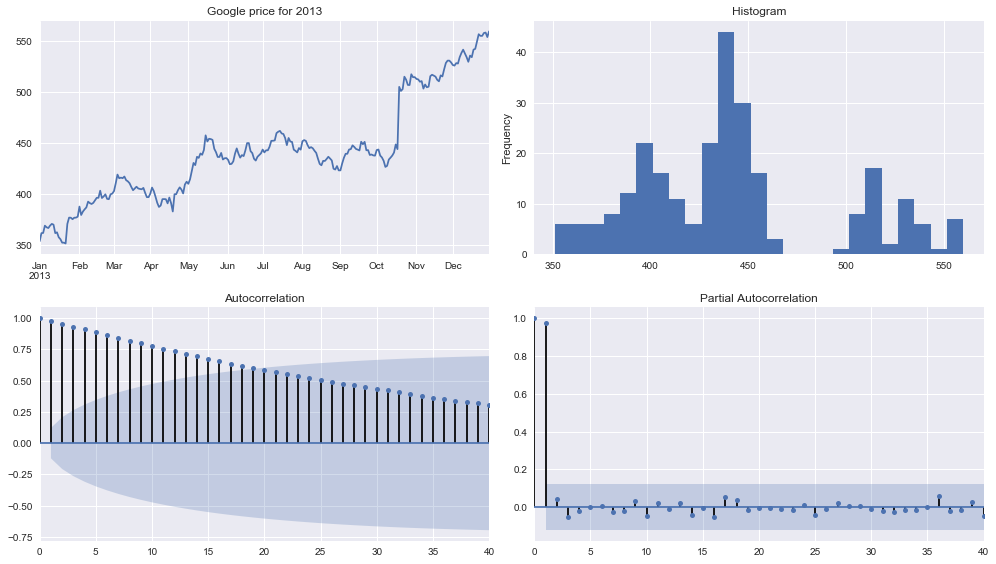

In [69]:
tsplot(google_price_ARIMA['2013'], title='Google price for 2013', lags =40)

The code generates a time series plot and various diagnostic plots for the price data of Google stock in the year 2013. It uses the `tsplot` function to create the plots.

The time series plot shows the trend and pattern of the Google stock price throughout the year 2013. It provides a visual representation of how the price fluctuated over time.

The histogram plot displays the distribution of the stock price values in 2013. It helps in understanding the frequency of different price levels and the shape of the distribution.

The autocorrelation function (ACF) plot shows the correlation between the stock price at different lags. It helps identify any significant patterns or dependencies in the price series.

The partial autocorrelation function (PACF) plot also examines the correlation between the stock price at different lags but removes the indirect correlation through intermediate lags. It helps identify the direct relationship between the price at a given lag and the current price.

By analyzing these plots, one can gain insights into the characteristics of the Google stock price series in 2013, such as trends, seasonality, autocorrelation, and potential lagged effects. These insights are valuable for time series analysis and forecasting.

(<matplotlib.axes._subplots.AxesSubplot at 0x10f4f7c18>,
 <matplotlib.axes._subplots.AxesSubplot at 0x11094fcc0>)

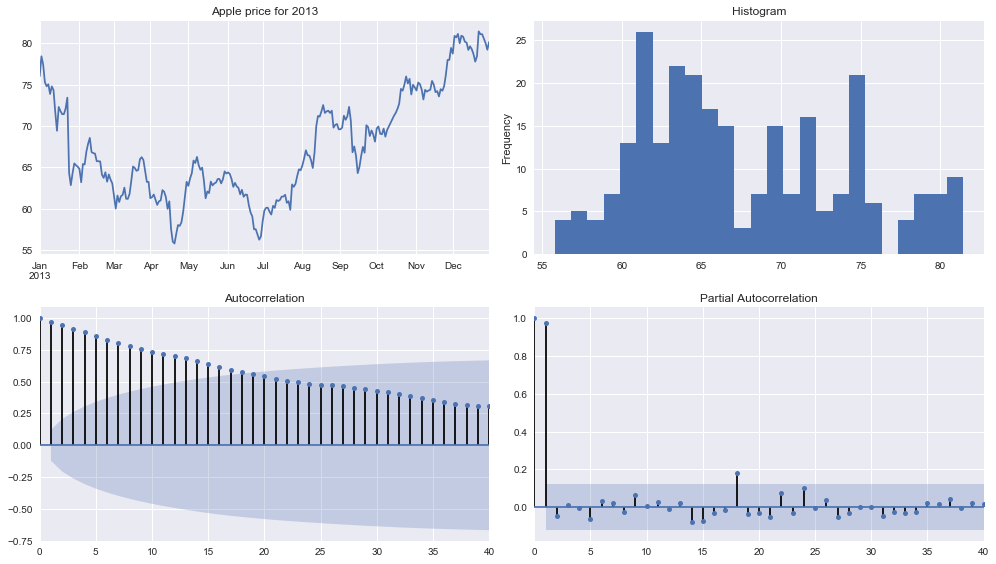

In [70]:
tsplot(apple_price_ARIMA['2013'], title='Apple price for 2013', lags = 40)

The code generates a time series plot and various diagnostic plots for the price data of Apple stock in the year 2013. It uses the `tsplot` function to create the plots.

The time series plot shows the trend and pattern of the Apple stock price throughout the year 2013. It provides a visual representation of how the price fluctuated over time.

The histogram plot displays the distribution of the stock price values in 2013. It helps in understanding the frequency of different price levels and the shape of the distribution.

The autocorrelation function (ACF) plot shows the correlation between the stock price at different lags. It helps identify any significant patterns or dependencies in the price series.

The partial autocorrelation function (PACF) plot also examines the correlation between the stock price at different lags but removes the indirect correlation through intermediate lags. It helps identify the direct relationship between the price at a given lag and the current price.

By analyzing these plots, one can gain insights into the characteristics of the Apple stock price series in 2013, such as trends, seasonality, autocorrelation, and potential lagged effects. These insights are valuable for time series analysis and forecasting.

Looking at the autocorrelation plots, it appears that the time series data is highly dependent on its history, with autocorrelation extending many periods back in time. However, examining the partial autocorrelation plots, it is clear that almost all of the correlation stems from the timestep immediately prior. 

In [868]:
google_returns_2013 = np.log(google_price_ARIMA['2013']).diff()[1:]
apple_returns_2013 = np.log(apple_price_ARIMA['2013']).diff()[1:]

The code calculates the daily returns of Google and Apple stock prices for the year 2013. It uses the `np.log` function to calculate the logarithm of the stock prices, and then applies the `diff` function to compute the difference between consecutive logarithmic prices.

For Google, the `google_price_ARIMA['2013']` series contains the daily closing prices of Google stock in 2013. The code first applies the `np.log` function to transform these prices into logarithmic values. Then, it uses the `diff` function to compute the difference between each pair of consecutive logarithmic prices. The result is stored in the `google_returns_2013` variable, representing the daily returns of Google stock for 2013.

Similarly, for Apple, the `apple_price_ARIMA['2013']` series contains the daily closing prices of Apple stock in 2013. The code applies the same process of calculating the logarithmic returns using the `np.log` and `diff` functions. The resulting series of returns is stored in the `apple_returns_2013` variable.

By computing the returns, we can analyze the percentage change in stock prices from one day to the next, which is useful for various financial analyses, including risk assessment, volatility estimation, and building predictive models for stock price movements.

(<matplotlib.axes._subplots.AxesSubplot object at 0x1a42e44a8>, <matplotlib.axes._subplots.AxesSubplot object at 0x1a471f908>, <matplotlib.axes._subplots.AxesSubplot object at 0x1a47ac588>)

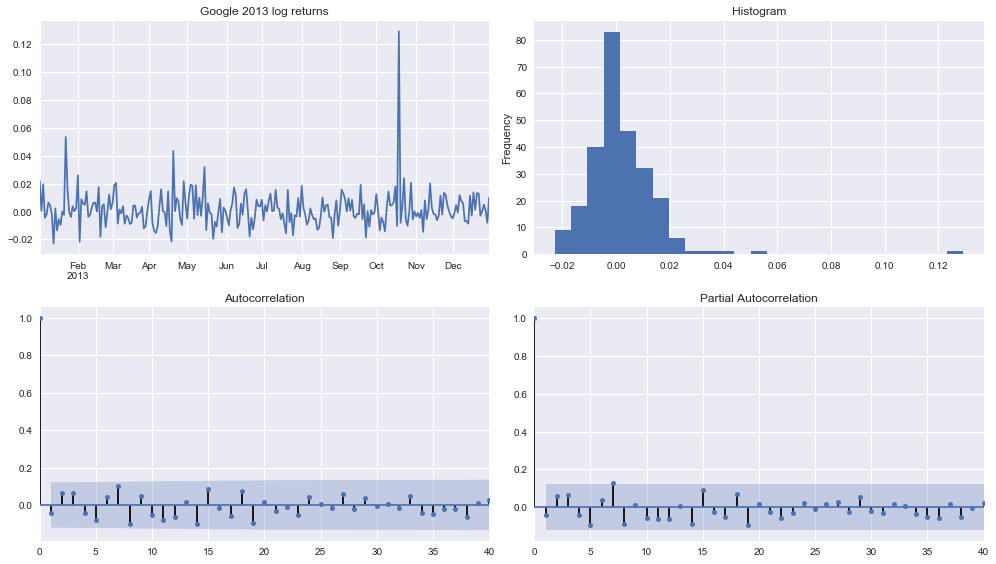

In [873]:
tsplot(google_returns_2013, title='Google 2013 log returns', lags = 40)

The code generates a time series plot for the daily logarithmic returns of Google stock in the year 2013. 

The `google_returns_2013` series represents the daily returns of Google stock, which were previously calculated as the difference between consecutive logarithmic prices. The code passes this series as the input to the `tsplot` function, along with a title for the plot (`'Google 2013 log returns'`) and the number of lags to include in the autocorrelation plot (40 lags in this case).

The `tsplot` function then generates a figure with four subplots. The first subplot displays the time series plot of the daily logarithmic returns, showing the fluctuation of returns over time. The second subplot is a histogram, visualizing the distribution of the returns. The third and fourth subplots depict the autocorrelation function (ACF) and partial autocorrelation function (PACF), respectively. These plots provide insights into the correlation and potential patterns in the returns at different time lags.

By examining the time series plot and the ACF/PACF plots, one can gain insights into the behavior, volatility, and potential dependencies of the daily returns of Google stock in 2013. These visualizations are commonly used in time series analysis to understand the characteristics of financial data and guide the selection of appropriate models for forecasting or analysis purposes.

(<matplotlib.axes._subplots.AxesSubplot object at 0x1a3f631d0>, <matplotlib.axes._subplots.AxesSubplot object at 0x1a4233390>, <matplotlib.axes._subplots.AxesSubplot object at 0x1a42bf320>)

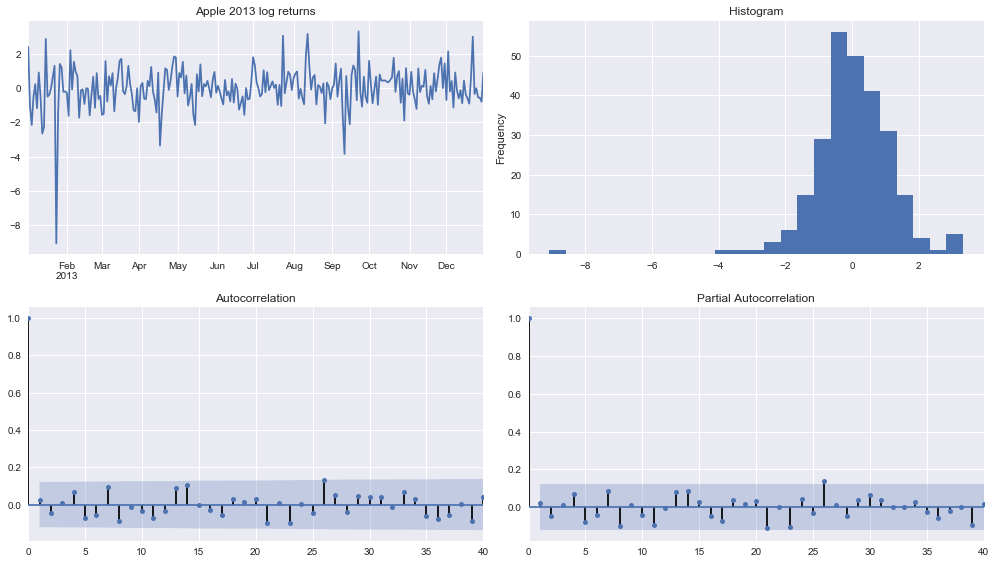

In [872]:
tsplot(apple_returns_2013, title='Apple 2013 log returns', lags = 40)

The code generates a time series plot for the daily logarithmic returns of Apple stock in the year 2013. 

The `apple_returns_2013` series represents the daily returns of Apple stock, which were previously calculated as the difference between consecutive logarithmic prices. The code passes this series as the input to the `tsplot` function, along with a title for the plot (`'Apple 2013 log returns'`) and the number of lags to include in the autocorrelation plot (40 lags in this case).

The `tsplot` function then generates a figure with four subplots. The first subplot displays the time series plot of the daily logarithmic returns, showing the fluctuation of returns over time. The second subplot is a histogram, visualizing the distribution of the returns. The third and fourth subplots depict the autocorrelation function (ACF) and partial autocorrelation function (PACF), respectively. These plots provide insights into the correlation and potential patterns in the returns at different time lags.

By examining the time series plot and the ACF/PACF plots, one can gain insights into the behavior, volatility, and potential dependencies of the daily returns of Apple stock in 2013. These visualizations are commonly used in time series analysis to understand the characteristics of financial data and guide the selection of appropriate models for forecasting or analysis purposes.

Note, first differencing appears to produce stationarity of the time series. Thus, we should enforce $d=1$. 

Returns appear to follow a random walk, where the current timestep is not correlated with any of the previous timesteps. This suggests an ARIMA(0,1,0) model, where the best prediction we can make it a constant value.
 
See Duke reference for guidance on analysis of time series with respect to ARIMA modeling. 

### Grid search for best ARIMA parameters

In [76]:
import itertools

import warnings
warnings.filterwarnings("ignore") # Ignore convergence warnings

def grid_search_SARIMA(y, pdq_min, pdq_max, seasonal_period):
    p = d = q = range(pdq_min, pdq_max+1)
    pdq = list(itertools.product(p, d, q))
    seasonal_pdq = [(x[0], x[1], x[2], seasonal_period) for x in list(itertools.product(p, d, q))]
    
    best_params = []
    best_seasonal_params = []
    score = 1000000000000 # this is a bit of a hack
    
    for param in pdq:
        for param_seasonal in seasonal_pdq:
            try:
                mod = sm.tsa.statespace.SARIMAX(y,
                                                order=param,
                                                seasonal_order=param_seasonal,
                                                enforce_stationarity=False,
                                                enforce_invertibility=False)

                results = mod.fit()
                logging.info('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
                if results.aic < score:
                    best_params = param
                    best_seasonal_params = param_seasonal
                    score = results.aic
            except:
                continue
    logging.info('\n\nBest ARIMA{}x{}12 - AIC:{}'.format(best_params, best_seasonal_params, score))
    return best_params, best_seasonal_params, score


params, seasonal_params, score = grid_search_SARIMA(google_price_ARIMA, 0, 2, 12)

ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:6898.362293047701
ARIMA(0, 0, 0)x(0, 0, 2, 12)12 - AIC:6200.392463920813
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:4377.816871987012
ARIMA(0, 0, 0)x(0, 1, 2, 12)12 - AIC:4278.05126125979
ARIMA(0, 0, 0)x(0, 2, 1, 12)12 - AIC:4276.299285445659
ARIMA(0, 0, 0)x(0, 2, 2, 12)12 - AIC:4176.806413694854
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:4465.432601601324
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:4446.857399572644
ARIMA(0, 0, 0)x(1, 0, 2, 12)12 - AIC:4320.115713978383
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:4386.46212764317
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:4376.855567398701
ARIMA(0, 0, 0)x(1, 1, 2, 12)12 - AIC:4279.127651774714
ARIMA(0, 0, 0)x(1, 2, 0, 12)12 - AIC:4454.8313975262445
ARIMA(0, 0, 0)x(1, 2, 1, 12)12 - AIC:4276.785787961944
ARIMA(0, 0, 0)x(1, 2, 2, 12)12 - AIC:4175.469208200152
ARIMA(0, 0, 0)x(2, 0, 0, 12)12 - AIC:4329.934376732559
ARIMA(0, 0, 0)x(2, 0, 1, 12)12 - AIC:4331.216630881858
ARIMA(0, 0, 0)x(2, 0, 2, 12)12 - AIC:4321.299433109684
ARIMA(0, 0,

The code performs a grid search for finding the best parameters for the SARIMA (Seasonal Autoregressive Integrated Moving Average) model applied to a given time series data (`y`).

The grid search iterates through various combinations of parameters (`pdq`) and seasonal parameters (`seasonal_pdq`) within specified ranges. These parameter combinations are used to fit SARIMA models to the time series data. The order of the SARIMA model is determined by the `pdq` combinations, and the seasonal order is determined by the `seasonal_pdq` combinations.

For each combination, the code attempts to fit a SARIMA model to the data using the `sm.tsa.statespace.SARIMAX` function from the `statsmodels` library. It then evaluates the model based on its Akaike Information Criterion (AIC) value, which measures the trade-off between the goodness of fit and the complexity of the model. Lower AIC values indicate better model fit.

The code keeps track of the best parameter and seasonal parameter combinations (`best_params` and `best_seasonal_params`) that yield the lowest AIC score. The initial `score` is set to a high value as a placeholder. If a model with a lower AIC score is found, the `best_params`, `best_seasonal_params`, and `score` variables are updated accordingly.

After the grid search completes, the code logs the best parameter and seasonal parameter combinations along with their AIC score. Finally, it returns the best parameter, best seasonal parameter, and the corresponding AIC score as the output.

In summary, the code automates the process of finding the optimal parameters for a SARIMA model by exhaustively searching through different combinations and selecting the one with the lowest AIC score. This approach helps identify the most suitable SARIMA model for forecasting or analyzing the given time series data.

### Fit a model and explore the results

In [271]:
mod = sm.tsa.statespace.SARIMAX(google_price_ARIMA,
                                order=(0, 1, 2),
                                seasonal_order=(0, 1, 2, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results = mod.fit()

print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.0166      0.055     -0.302      0.763      -0.124       0.091
ma.L2          0.0173      0.061      0.284      0.776      -0.102       0.137
ma.S.L12      -1.0085    117.970     -0.009      0.993    -232.226     230.209
ma.S.L24       0.0085      1.017      0.008      0.993      -1.985       2.002
sigma2        27.0053   3186.030      0.008      0.993   -6217.499    6271.510


The code fits a SARIMAX (Seasonal Autoregressive Integrated Moving Average with Exogenous variables) model to the `google_price_ARIMA` time series data.

The SARIMAX model is specified with the following parameters:
- The non-seasonal orders (p, d, q) are set to (0, 1, 2), indicating that the model includes an autoregressive component of order 0, a differencing of order 1, and a moving average component of order 2.
- The seasonal orders (P, D, Q, s) are set to (0, 1, 2, 12), indicating that the model includes a seasonal autoregressive component of order 0, a seasonal differencing of order 1, a seasonal moving average component of order 2, and a seasonal period of 12 (months in this case).
- The `enforce_stationarity` and `enforce_invertibility` parameters are set to `False`, indicating that there is no strict enforcement of stationarity or invertibility of the model.

The `mod.fit()` function is used to fit the SARIMAX model to the data, and the results are stored in the `results` object.

Finally, the code prints the summary table of the model results using `results.summary().tables[1]`. This table provides information such as coefficient estimates, standard errors, p-values, and other statistical metrics related to the fitted SARIMAX model.

In [272]:
pred = results.get_prediction(start = pd.to_datetime('2013-10-1'), end = pd.to_datetime('2013-12-31'), dynamic=False)
pred_ci = pred.conf_int()

The code performs a prediction using the fitted SARIMAX model (`results`) for a specific time period. 

The `get_prediction()` function is called on the `results` object to generate predictions. The `start` and `end` parameters specify the range of dates for which the predictions are made. In this case, the predictions are made from October 1, 2013, to December 31, 2013.

The `dynamic` parameter is set to `False`, indicating that the prediction is not dependent on previous forecasted values.

The predicted values are stored in the `pred` object, which contains information such as the predicted mean values and confidence intervals.

The `conf_int()` function is then called on the `pred` object to compute the confidence intervals for the predicted values. The resulting `pred_ci` object contains the lower and upper confidence bounds for the predictions.

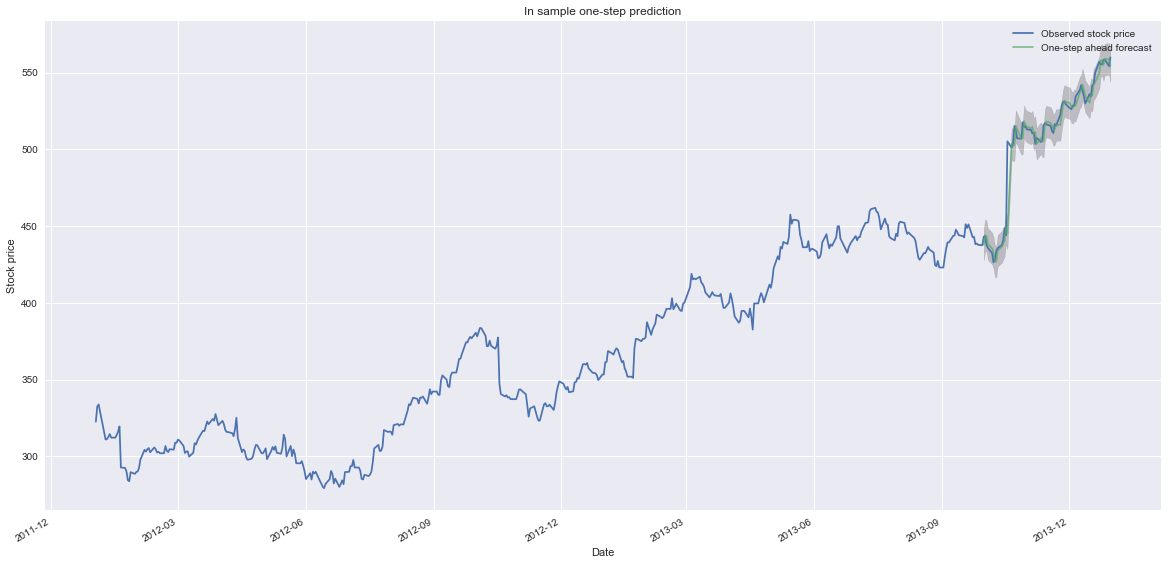

In [250]:
fig, ax = plt.subplots(figsize=(20,10))
ax.plot(google_price_ARIMA.index, google_price_ARIMA, 
        label='Observed stock price')
ax.plot(pred.predicted_mean.index, pred.predicted_mean, 
        label='One-step ahead forecast', alpha=.7)
fig.autofmt_xdate()
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Stock price')
ax.set_title('In sample one-step prediction')
plt.legend()

This code generates a plot to visualize the observed stock price (`google_price_ARIMA`) and the one-step ahead forecast (`pred.predicted_mean`) for a specific time period.

A figure object (`fig`) and an axes object (`ax`) are created, specifying the size of the figure as 20x10.

The observed stock price is plotted using `ax.plot()` function, with the x-axis representing the dates from `google_price_ARIMA.index` and the y-axis representing the stock prices. This line is labeled as "Observed stock price".

The one-step ahead forecast is also plotted using `ax.plot()`, with the x-axis representing the dates from `pred.predicted_mean.index` and the y-axis representing the predicted stock prices. This line is labeled as "One-step ahead forecast" and has an alpha value of 0.7 to make it slightly transparent.

The `fill_between()` function is used to fill the area between the upper and lower confidence bounds (`pred_ci.iloc[:, 0]` and `pred_ci.iloc[:, 1]`) with a black color and an alpha value of 0.2, creating a shaded region that represents the confidence interval of the forecast.

Axis labels for the x-axis and y-axis are set using `ax.set_xlabel()` and `ax.set_ylabel()`, respectively. The title of the plot is set using `ax.set_title()`.

Finally, a legend is added to the plot using `plt.legend()` to distinguish between the observed stock price and the forecasted values.

In [81]:
pred_dynamic = results.get_prediction(start = pd.to_datetime('2013-11-1'), dynamic=True, full_results=True)
pred_ci_dynamic = pred_dynamic.conf_int()

This code generates a dynamic prediction for the stock price using the SARIMA model (`results`) obtained earlier. The prediction starts from the date '2013-11-1' and is performed dynamically, meaning that each forecasted value is used as an input for predicting the next value.

The `get_prediction()` method is called with the specified start date, enabling dynamic prediction by setting `dynamic=True`. Additionally, `full_results=True` is set to obtain the full set of results, including confidence intervals.

The resulting prediction object (`pred_dynamic`) contains the forecasted values and corresponding confidence intervals. The confidence intervals are extracted using the `conf_int()` method, storing them in the `pred_ci_dynamic` variable.

Overall, this code performs a dynamic prediction for the stock price, allowing the forecasted values to influence the predictions for subsequent time steps, and provides confidence intervals for the forecasted values.

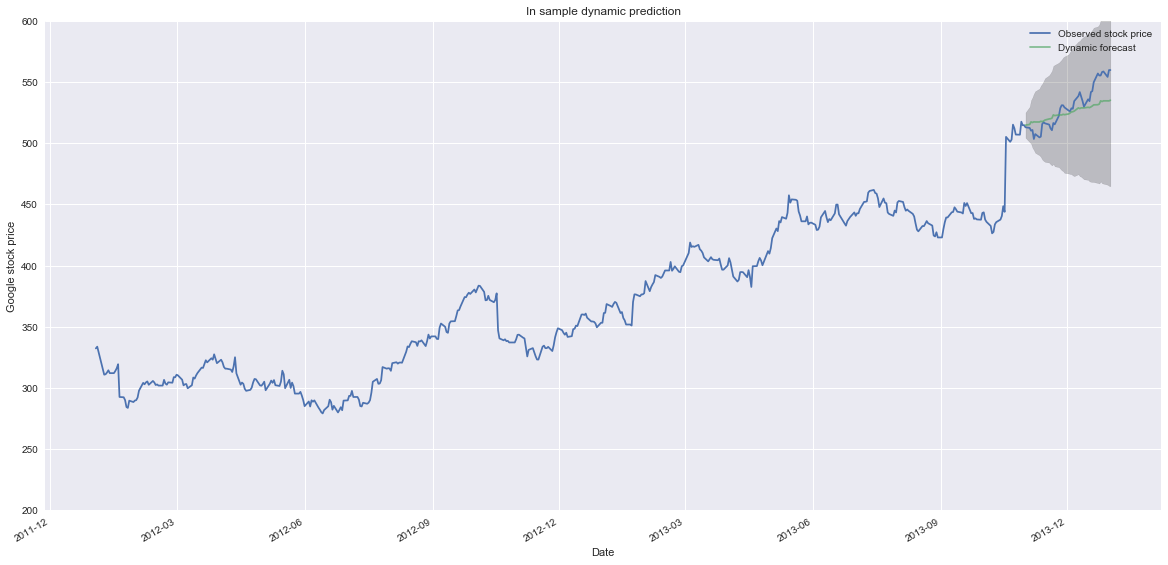

In [82]:
fig, ax = plt.subplots(figsize=(20,10))
ax.plot(google_price_ARIMA.index, google_price_ARIMA, 
        label='Observed stock price')
ax.plot(pred_dynamic.predicted_mean.index, pred_dynamic.predicted_mean, 
        label='Dynamic forecast', alpha=.7)
fig.autofmt_xdate()
ax.fill_between(pred_ci_dynamic.index,
                pred_ci_dynamic.iloc[:, 0],
                pred_ci_dynamic.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Google stock price')
ax.set_title('In sample dynamic prediction')
ax.set_ylim(200,600)
plt.legend()

This code creates a plot to visualize the observed stock price (`google_price_ARIMA`) alongside the dynamic forecasted values obtained from the SARIMA model (`pred_dynamic`).

The `fig, ax = plt.subplots(figsize=(20,10))` line creates a figure and axes object with a specified size for the plot.

The `ax.plot()` function is used to plot the observed stock price on the axes, with the label 'Observed stock price'.

Next, the dynamic forecasted values are plotted using `ax.plot()`, with the label 'Dynamic forecast'. The `alpha` parameter controls the transparency of the line.

`fig.autofmt_xdate()` is used to format the x-axis tick labels for better readability.

The `ax.fill_between()` function is used to fill the area between the upper and lower confidence intervals (`pred_ci_dynamic`) with a color (`color='k'` refers to black) and transparency (`alpha=.2`).

The x-axis label is set to 'Date' using `ax.set_xlabel()`, and the y-axis label is set to 'Google stock price' using `ax.set_ylabel()`.

The title of the plot is set to 'In sample dynamic prediction' using `ax.set_title()`.

The y-axis limits are set to be between 200 and 600 using `ax.set_ylim()`.

Finally, the legend is displayed using `plt.legend()`, showing the labels for the observed stock price and the dynamic forecast.

In [84]:
# Get forecast 500 steps ahead in future
pred_future = results.get_forecast(steps=100)

# Get confidence intervals of forecasts
pred_future_ci = pred_future.conf_int()

This code generates forecasts for the stock price (`pred_future`) for a specified number of steps (100 steps in this case) into the future using the SARIMA model (`results`).

The `results.get_forecast()` function is used to obtain the forecasted values. The `steps` parameter determines the number of steps into the future to forecast.

The `pred_future.conf_int()` function calculates the confidence intervals for the forecasted values (`pred_future`). The resulting confidence intervals (`pred_future_ci`) provide an estimate of the range within which the actual future values are likely to fall.

Overall, this code allows us to obtain forecasts and their confidence intervals for the stock price of the given company, extending the predictions into the future beyond the available data.

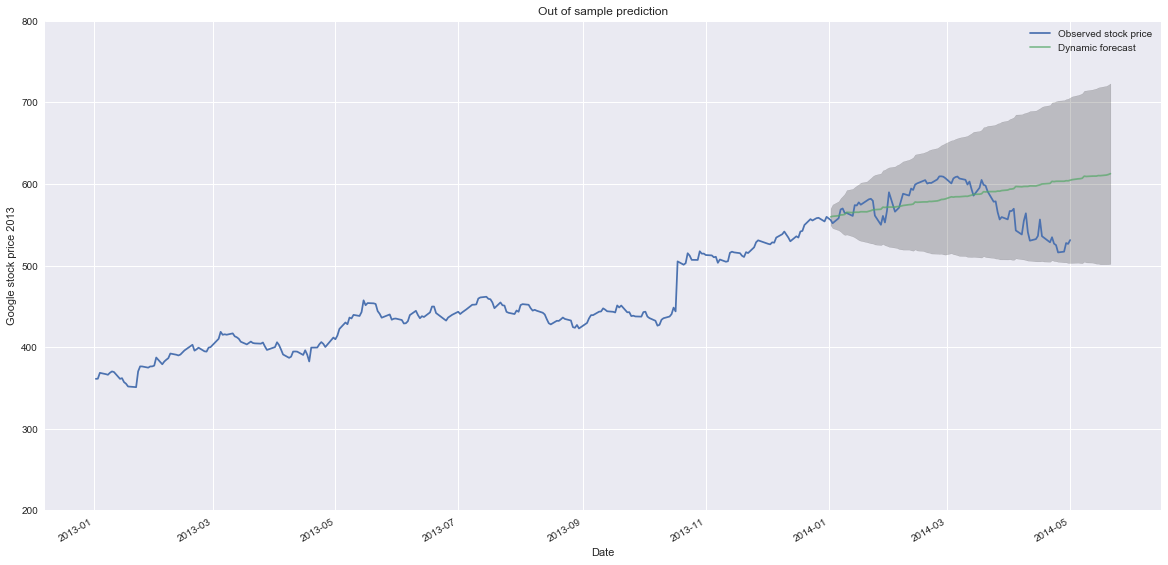

In [85]:
fig, ax = plt.subplots(figsize=(20,10))
ax.plot(company_price_ARIMA['GOOG']['2013':'2014-05-01'].index, company_price_ARIMA['GOOG']['2013':'2014-05-01'], 
        label='Observed stock price')
ax.plot(pd.to_datetime(pred_future.predicted_mean.index), pred_future.predicted_mean, 
        label='Dynamic forecast', alpha=.7)
fig.autofmt_xdate()
ax.fill_between(pred_future_ci.index,
                pred_future_ci.iloc[:, 0],
                pred_future_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Google stock price 2013')
ax.set_title('Out of sample prediction')
ax.set_ylim(200,800)
plt.legend()

This code generates a plot (`fig, ax = plt.subplots(figsize=(20,10))`) to visualize the observed stock price for Google (`company_price_ARIMA['GOOG']['2013':'2014-05-01']`) and the dynamic forecasted values (`pred_future.predicted_mean`) for a future time period.

The observed stock price is plotted as a line graph, while the dynamic forecasted values are represented by another line graph. The `alpha=.7` parameter adjusts the transparency of the dynamic forecast line.

The `fig.autofmt_xdate()` function formats the x-axis labels of the plot to improve readability.

The confidence intervals (`pred_future_ci`) are represented as a shaded region around the dynamic forecast line using `ax.fill_between()`. This shaded region visually represents the uncertainty in the forecasted values.

The x-axis is labeled as "Date", the y-axis is labeled as "Google stock price 2013", and the plot is titled "Out of sample prediction". The `ax.set_ylim(200,800)` sets the y-axis limits to adjust the vertical scale of the plot.

Finally, `plt.legend()` displays a legend indicating the labels of the observed stock price and the dynamic forecast lines for better understanding of the plot.

Training.

ARIMA models are not typically trained across time series unless the time series data is generated by the same process. For the case of stock prices, there exist independent influences on individual companies that does not uniformly affect all companies. Thus, 5 different ARIMA models will be trained for different companies, evaluating each model individually and averaging the result.  

In [665]:
google_arima_train = company_price_df['GOOG']['2009':'2012']
amazon_arima_train = company_price_df['AMZN']['2009':'2012']
mmm_arima_train = company_price_df['MMM']['2009':'2012']
chipotle_arima_train = company_price_df['CMG']['2009':'2012']
duke_arima_train = company_price_df['DUK']['2009':'2012']

companies_train = [google_arima_train, amazon_arima_train, mmm_arima_train, chipotle_arima_train, duke_arima_train]

google_arima_test = company_price_df['GOOG']['2013':'2014']
amazon_arima_test = company_price_df['AMZN']['2013':'2014']
mmm_arima_test = company_price_df['MMM']['2013':'2014']
chipotle_arima_test = company_price_df['CMG']['2013':'2014']
duke_arima_test = company_price_df['DUK']['2013':'2014']

companies_test = [google_arima_test, amazon_arima_test, mmm_arima_test, chipotle_arima_test, duke_arima_test]

This code separates the historical stock price data of different companies into training and testing sets. 

For the training sets, the code selects the stock price data for Google, Amazon, 3M, Chipotle, and Duke Energy from the time period between 2009 and 2012. These datasets are stored in variables `google_arima_train`, `amazon_arima_train`, `mmm_arima_train`, `chipotle_arima_train`, and `duke_arima_train`, respectively.

For the testing sets, the code selects the stock price data for the same companies but from the time period between 2013 and 2014. These datasets are stored in variables `google_arima_test`, `amazon_arima_test`, `mmm_arima_test`, `chipotle_arima_test`, and `duke_arima_test`, respectively.

By splitting the data into training and testing sets, it allows for the evaluation and validation of forecasting models using the historical data for training and assessing their performance on unseen data from the testing period.

In [666]:
company_results = []
for company_price in companies_train:
    model = sm.tsa.statespace.SARIMAX(company_price,
                                order=(0, 1, 2),
                                seasonal_order=(0, 1, 2, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

    results = model.fit()
    company_results.append(results)

This code performs time series modeling using SARIMAX (Seasonal Autoregressive Integrated Moving Average with Exogenous Factors) for each company in the training set.

For each company, the code creates a SARIMAX model by specifying the order of the autoregressive (AR), differencing (I), and moving average (MA) components, as well as the seasonal order. In this case, the SARIMAX model has an order of (0, 1, 2) for the non-seasonal components and a seasonal order of (0, 1, 2, 12) indicating a seasonal pattern with a period of 12 months.

The model is then fitted to the historical stock price data of the respective company using the `fit()` method. The results of the model fitting, including the estimated parameters and other statistical information, are stored in a list called `company_results`.

By iterating over each company in the training set and fitting a SARIMAX model, this code allows for individual modeling and analysis of each company's stock price data.

Evaluation.

We'll evaluate each model on three timescales: a 5 day forecast, a 20 day forecast, and a 100 day forecast. Long-term prediction is very difficult, especially for stochastic processes; thus, the short-term forecast provides a more reasonable measure of performance.   

In [682]:
forecast_5_day = []
forecast_20_day = []
forecast_100_day = []

for result in company_results:
    forecast_5_day.append(result.get_forecast(steps=5))
    forecast_20_day.append(result.get_forecast(steps=20))
    forecast_100_day.append(result.get_forecast(steps=100))

This code generates forecasts for multiple time horizons (5 days, 20 days, and 100 days) using the SARIMAX models previously fitted to the company stock price data.

For each model stored in the `company_results` list, the code calls the `get_forecast()` method with the specified number of steps to generate the forecasts. The `steps` parameter indicates the number of future periods for which the forecast is generated.

The forecasts are then appended to three separate lists: `forecast_5_day`, `forecast_20_day`, and `forecast_100_day`. Each list contains the forecasts generated by the corresponding SARIMAX model for the respective time horizon.

By iterating over the fitted models, this code collects the forecasts for different time horizons, allowing for further analysis and evaluation of the predicted future values of the stock prices.

In [683]:
from sklearn.metrics import mean_absolute_error

forecast_5_day_mae = []
for true, pred in zip(companies_test, forecast_5_day):
    forecast_5_day_mae.append(mean_absolute_error(true.iloc[0:5], pred.predicted_mean))
    
forecast_20_day_mae = []
for true, pred in zip(companies_test, forecast_20_day):
    forecast_20_day_mae.append(mean_absolute_error(true.iloc[0:20], pred.predicted_mean))
    
forecast_100_day_mae = []
for true, pred in zip(companies_test, forecast_100_day):
    forecast_100_day_mae.append(mean_absolute_error(true.iloc[0:100], pred.predicted_mean))
    
    
print('Average MAE across companies (5 day): {:.6f}'.format(np.mean(forecast_5_day_mae)))
print('Average MAE across companies (20 day): {:.6f}'.format(np.mean(forecast_20_day_mae)))
print('Average MAE across companies (100 day): {:.6f}'.format(np.mean(forecast_100_day_mae)))

Average MAE across companies (5 day): 0.009500
Average MAE across companies (20 day): 0.009690
Average MAE across companies (100 day): 0.009965


This code calculates the Mean Absolute Error (MAE) for the forecasts generated by the SARIMAX models for different time horizons (5 days, 20 days, and 100 days) compared to the actual stock prices of the companies in the test dataset.

The code iterates over the `companies_test` and `forecast_X_day` lists, where `X` represents the respective time horizon. In each iteration, it computes the MAE by comparing the true values (`true.iloc[0:X]`) with the predicted mean values (`pred.predicted_mean`) for the corresponding time horizon.

The computed MAE values are then appended to separate lists: `forecast_5_day_mae`, `forecast_20_day_mae`, and `forecast_100_day_mae`.

Finally, the code prints the average MAE across the companies for each time horizon, providing an indication of the average forecast accuracy. The calculated MAE values represent the average absolute difference between the predicted stock prices and the true stock prices over the specified number of days.

Let's examine what the long term predictions look like. 

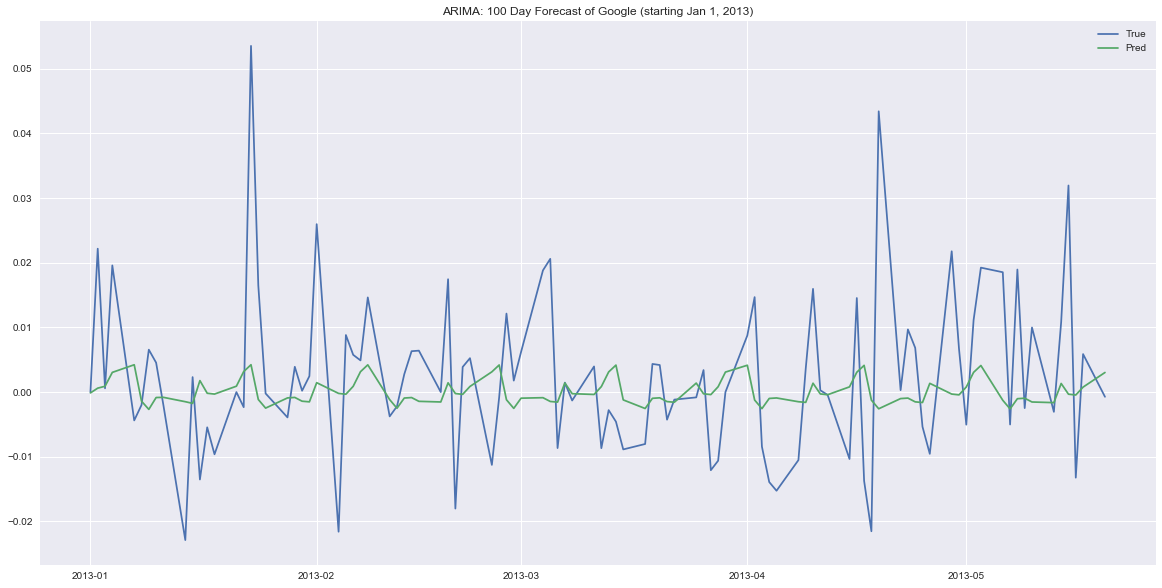

In [685]:
fig, ax = plt.subplots(figsize=(20,10))
ax.plot(google_arima_test.iloc[0:100], label='True')
ax.plot(forecast_100_day[0].predicted_mean, label='Pred')
ax.set_title('ARIMA: 100 Day Forecast of Google (starting Jan 1, 2013)')
plt.legend()

This code creates a plot showing the true stock prices of Google for the first 100 days of the test dataset, along with the corresponding predicted stock prices generated by the ARIMA model with a 100-day forecast horizon.

The code uses `plt.subplots()` to create a figure and axes for the plot, specifying the size of the figure as (20, 10) to make it larger for better visibility.

The plot is generated using `ax.plot()`. It plots the true stock prices of Google for the first 100 days (`google_arima_test.iloc[0:100]`) with the label 'True'. It also plots the predicted mean stock prices for the same 100-day period (`forecast_100_day[0].predicted_mean`) with the label 'Pred'.

The title of the plot is set as 'ARIMA: 100 Day Forecast of Google (starting Jan 1, 2013)'.

Finally, `plt.legend()` is called to display the legend in the plot, indicating the labels for the true and predicted data.

LSTM Price Prediction

### Data preparation

In [606]:
# Load a test company for inspection
LSTM_company_prices = load_company_price_history(['GOOG', 'AMZN', 'MMM', 'CMG', 'DUK'], normalize = True)

LSTM_prices_train = LSTM_company_prices['2009':'2012']
LSTM_prices_test = LSTM_company_prices['2013':'2014']
LSTM_prices_val = LSTM_company_prices['2015':'2016']

2017-09-20 22:09:46,753 - DEBUG - Reading company prices for GOOG
2017-09-20 22:09:46,759 - DEBUG - Reading company prices for AMZN
2017-09-20 22:09:46,763 - DEBUG - Reading company prices for MMM
2017-09-20 22:09:46,767 - DEBUG - Reading company prices for CMG
2017-09-20 22:09:46,771 - DEBUG - Reading company prices for DUK
2017-09-20 22:09:46,825 - INFO - Null values found after cleaning: False


This code loads the historical price data of several companies (GOOG, AMZN, MMM, CMG, DUK) for inspection and analysis using a Long Short-Term Memory (LSTM) model. The prices are normalized before further processing.

The price data is divided into three subsets: training, testing, and validation. The training subset contains the price data from the year 2009 to 2012, the testing subset contains the price data from the year 2013 to 2014, and the validation subset contains the price data from the year 2015 to 2016.

These subsets are created to facilitate the training, evaluation, and fine-tuning of the LSTM model for predicting stock prices. The training subset is used to train the model, the testing subset is used to evaluate its performance on unseen data, and the validation subset is used for further evaluation and parameter tuning.

In [607]:
def price_generator(data, window=180, batch_size=128):
    ''' Accepts price history as a numpy array of shape (timesteps, companies) and builds windows for input, output 
    pairs. Output is calculated as the t+1 timestep. 
    
    Training/validation/testing data must be split prior to this generator. 
    
    Args:
        data: Array of company(ies) price history with shape (timesteps, companies)
        window: Length to build input and output sequences. 
        batch_size: Number of samples to return for batch training. 
        
    Yields:
        input_prices: A sequence of prices: [t-window, t-window+1, t-window+2, ..., t-1]
        output_prices: A sequence of prices offset by one day: [t-window+1, t-window+2, t-window+3, ..., t] 
    '''
    
    timesteps = data.shape[0]
    companies = data.shape[1]
    
    if window + batch_size > timesteps:
        logging.warning('Not enough data to fill a batch, forcing smaller batch size.')
        batch_size = timesteps - window
    
    # Index to keep track of place within price timeseries, corresponds with the last day of output
    i = window
    
    # Index to keep track of which company to query the data from
    j = 0
    
    while True:
        # If there aren't enough sequential days to fill a batch, go to next company
        if i + batch_size >= timesteps:
            i = window
            
            # If end of companies has been reached, start back at first company
            if j+1 >= companies:
                j=0
            else:
                j+=1
            
        
        samples = np.arange(i, i + batch_size)
        i += len(samples)
        
        input_prices = np.zeros((batch_size, window, 1))
        output_prices = np.zeros((batch_size, window, 1))
        
        for k, sample in enumerate(samples):
            input_prices[k] = data[np.arange(sample-window, sample),j].reshape(window, 1)
            output_prices[k] = data[np.arange(sample-window+1, sample+1),j].reshape(window, 1)
        
        yield input_prices, output_prices

This code defines a generator function called `price_generator` that takes a numpy array of company price history and creates input-output pairs for training an LSTM model. The generator generates batches of input and output sequences based on a specified window size and batch size.

The function accepts the price history data, window size, and batch size as arguments. The window size determines the length of the input and output sequences, and the batch size determines the number of samples returned for each batch during training.

The generator operates in an infinite loop, yielding batches of input and output sequences. It keeps track of the current position within the price time series using indices. If there are not enough sequential days to fill a batch, it moves to the next company's data. If the end of the companies has been reached, it starts back at the first company.

For each batch, it selects the appropriate slices from the price data and constructs the input and output sequences. The input sequence consists of prices from `t-window` to `t-1`, and the output sequence consists of prices from `t-window+1` to `t`. The sequences are reshaped to have a specific shape required by the LSTM model.

The generator repeatedly yields these input and output sequences as long as it is called in a loop or as part of a training process.

In [608]:
window_size = 180 
batch_size = 64

train_gen = price_generator(LSTM_prices_train.values, window=window_size, batch_size=batch_size)
train_steps = (LSTM_prices_train.shape[0] // batch_size)*LSTM_prices_train.shape[1]

val_gen = price_generator(LSTM_prices_val.values, window=window_size, batch_size=batch_size)
val_steps = (LSTM_prices_val.shape[0] // batch_size)*LSTM_prices_val.shape[1]

test_gen = price_generator(LSTM_prices_test.values, window=window_size, batch_size=batch_size)
test_steps = (LSTM_prices_test.shape[0] // batch_size)*LSTM_prices_test.shape[1]

This code sets up data generators for training, validation, and testing of an LSTM model using the `price_generator` function. 

The `window_size` and `batch_size` variables determine the window size and batch size to be used by the generator. 

For the training data, the `price_generator` is called with the price history of the training data (`LSTM_prices_train.values`) as input. The generator is configured with the specified `window_size` and `batch_size`. The `train_steps` variable is then calculated based on the number of training data points and the batch size. It represents the number of steps needed to iterate through the training data using the generator.

Similarly, data generators are created for the validation and testing data (`LSTM_prices_val` and `LSTM_prices_test`) using the same `window_size` and `batch_size`. The corresponding `val_steps` and `test_steps` variables are calculated based on the sizes of the validation and testing data.

These data generators and step counts are essential for training an LSTM model in batches and evaluating the model's performance on different datasets.

### Build the model

In [609]:
from keras.models import Sequential
from keras.layers import Dense, TimeDistributed, LSTM


# define LSTM configuration
n_features = 1 # only price
window = 180 # look back 50 days
batch_size = 128

# create LSTM
price_only_model = Sequential()
price_only_model.add(LSTM(20, input_shape=(window, n_features), return_sequences=True))
price_only_model.add(LSTM(60, return_sequences=True))
price_only_model.add(TimeDistributed(Dense(1)))
print(price_only_model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_7 (LSTM)                (None, 180, 20)           1760      
_________________________________________________________________
lstm_8 (LSTM)                (None, 180, 60)           19440     
_________________________________________________________________
time_distributed_8 (TimeDist (None, 180, 1)            61        
Total params: 21,261.0
Trainable params: 21,261
Non-trainable params: 0.0
_________________________________________________________________
None


This code sets up an LSTM model for predicting stock prices using Keras. 

The model architecture is defined as a sequence of layers. 

The input shape for the model is specified as `(window, n_features)`, where `window` represents the number of previous days to consider for prediction, and `n_features` is the number of input features (in this case, 1 for price). 

The model consists of two LSTM layers. The first LSTM layer has 20 units and returns sequences, which means it passes the output sequence to the next layer. The second LSTM layer has 60 units and also returns sequences. 

A `TimeDistributed` layer with a `Dense` layer is added after the second LSTM layer. The `TimeDistributed` layer applies the `Dense` layer to each timestep independently, allowing the model to make predictions at each timestep. 

Finally, the model summary is printed, which provides an overview of the model architecture, the number of parameters, and the shape of the output at each layer.

In [611]:
from keras.callbacks import ModelCheckpoint 

price_only_model.compile(loss='mean_absolute_error', optimizer='adam')

checkpointer = ModelCheckpoint(filepath='saved_models/weights.best.price_only.hdf5', 
                               verbose=1, save_best_only=True)

# Train LSTM
history = price_only_model.fit_generator(train_gen, steps_per_epoch=train_steps, epochs=3, callbacks=[checkpointer], 
                                         validation_data=val_gen, validation_steps=val_steps)

Epoch 1/3
80/80 [==============================] - 85s - loss: 0.0121 - val_loss: 0.0108
Epoch 2/3
80/80 [==============================] - 79s - loss: 0.0125 - val_loss: 0.0109
Epoch 3/3
80/80 [==============================] - 79s - loss: 0.0117 - val_loss: 0.0108


This code sets up the training process for the LSTM model to predict stock prices.

First, the model is compiled by specifying the loss function ('mean_absolute_error') and the optimizer ('adam') to use during training.

A `ModelCheckpoint` callback is created, which will monitor the validation loss and save the weights of the best performing model during training. The weights are saved to the file path specified in the `filepath` parameter.

Then, the `fit_generator` method is called to train the LSTM model. It takes in the training generator (`train_gen`) which generates input-output pairs for training, the number of steps per epoch (`train_steps`) indicating the number of batches to process in each epoch, the number of epochs to train (`epochs`), and the validation generator (`val_gen`) and the number of validation steps (`val_steps`) for monitoring the model's performance on the validation data.

During training, the `ModelCheckpoint` callback will save the weights of the best model based on the validation loss.

The training progress and performance metrics such as loss and validation loss are stored in the `history` object, which can be used for analysis and visualization.

In [645]:
# Load weights from previous training
price_only_model.load_weights('saved_models/weights.best.price_only.hdf5')

This code loads the saved weights of a previously trained LSTM model. The model's architecture and configuration should match the model for which the weights were saved. By loading the weights, the model's parameters are set to the values that were learned during the previous training process. This allows us to use the trained model for making predictions without having to train it again from scratch.

In [191]:
def validation_curve(history):
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(len(loss))

    plt.figure()
    plt.plot(epochs, loss, 'g', label='Training loss')
    plt.plot(epochs, val_loss, 'b', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

This code defines a function called `validation_curve` that plots the training loss and validation loss over the epochs of a model training process. The function takes the `history` object as input, which contains the loss values recorded during training. It extracts the training loss and validation loss values from the `history` object and plots them against the number of epochs. The training loss is plotted in green, and the validation loss is plotted in blue. The plot provides a visual representation of the model's performance and the convergence of the training process. It helps in assessing whether the model is overfitting or underfitting, as well as determining the optimal number of epochs for training.

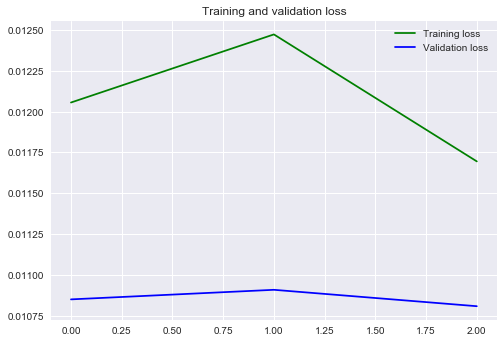

In [613]:
validation_curve(history)

This code calls the `validation_curve` function and passes the `history` object as an argument. The `history` object contains the recorded training and validation loss values during the training process of a model. 

By calling `validation_curve(history)`, the function is executed, which plots the training loss and validation loss on a graph. The training loss is plotted in green, and the validation loss is plotted in blue. The x-axis represents the number of epochs (training iterations), and the y-axis represents the loss values. 

The resulting plot provides a visual representation of how the training loss and validation loss change over the epochs. It helps in understanding the performance of the model during training, identifying overfitting or underfitting, and determining if the model is converging effectively. Comparing the training loss and validation loss can give insights into the model's generalization capability and can aid in making decisions on adjusting hyperparameters or stopping the training process.

### Evaluate model

In [631]:
def forecast(seed_data, forecast_steps, model):
    '''
    Forecast future returns by making day-by-day predictions.
    
    Args:
        seed_data: Initial input sequence.
        forecast_steps: Defines how many steps into the future to predict.
        model: Trained LSTM prediction model. 
    '''
    
    future = []
    
    for timestep in range(forecast_steps):
        pred = model.predict(seed_data)[0][-1][0]
        future.append(pred)
        seed_data = np.append(seed_data[0][1:], [pred]).reshape(1, seed_data.shape[1], 1)

    return future

The `forecast` function accepts three arguments: `seed_data`, `forecast_steps`, and `model`. 

The `seed_data` parameter represents the initial input sequence that the model will use to start making predictions. It serves as the starting point for forecasting future returns.

The `forecast_steps` parameter determines the number of steps into the future that the function will predict. It defines how many subsequent time steps the model will forecast.

The `model` parameter represents the trained LSTM prediction model that will be used to make the predictions.

Inside the function, a `future` list is initialized to store the predicted values of future returns. The function then enters a loop that iterates `forecast_steps` times. In each iteration, the model predicts the next value based on the `seed_data` input sequence. This predicted value is appended to the `future` list. The `seed_data` sequence is updated by removing the first element and adding the predicted value at the end, representing the new input sequence for the next prediction.

Finally, the function returns the `future` list containing the predicted future returns based on the given `seed_data`, `forecast_steps`, and trained `model`.

In [638]:
# Define initial input sequence for forecasting
seed = company_prices_train.iloc[-window:]

initial_inputs = []
for company in seed:
    initial_inputs.append(seed[company].values.reshape(1, seed.values.shape[0], 1))

The code defines the initial input sequence for forecasting by selecting the last `window` days of historical company prices from the `company_prices_train` dataset. 

It initializes an empty list called `initial_inputs` to store the input sequences for each company. Then, it iterates over each company in the `seed` sequence and appends the corresponding values as a separate input sequence to the `initial_inputs` list. 

Each input sequence is reshaped to have the dimensions `(1, window, 1)`, where `1` represents the number of samples, `window` represents the length of the input sequence, and `1` represents the number of features (in this case, it's the company price).

Overall, the code prepares the initial input sequences for forecasting by separating the historical prices of each company into individual sequences and reshaping them to the required input shape for the model.

In [686]:
# Create forecasts 
forecast_5_day = []
forecast_20_day = []
forecast_100_day = []

for company_seed in initial_inputs:
    forecast_5_day.append(forecast(company_seed, 5, price_only_model))
    forecast_20_day.append(forecast(company_seed, 20, price_only_model))
    forecast_100_day.append(forecast(company_seed, 100, price_only_model))

The code generates forecasts for multiple companies using the trained LSTM model `price_only_model`. 

It initializes three empty lists: `forecast_5_day`, `forecast_20_day`, and `forecast_100_day` to store the forecasts for different prediction horizons. 

Then, it iterates over each company's initial input sequence in `initial_inputs`. For each company, it calls the `forecast` function with the company's initial input sequence, the desired forecast horizon (5, 20, or 100), and the trained LSTM model `price_only_model`. 

The `forecast` function uses the provided input sequence and the model to make day-by-day predictions for the specified forecast horizon. The resulting forecasts are appended to the corresponding list based on the forecast horizon.

By the end of the loop, the `forecast_5_day`, `forecast_20_day`, and `forecast_100_day` lists contain the forecasts for each company at their respective forecast horizons.

In [687]:
# Evaluate forecasts
from sklearn.metrics import mean_absolute_error

forecast_5_day_mae = []
for i, pred in enumerate(forecast_5_day):
    forecast_5_day_mae.append(mean_absolute_error(company_prices_test.iloc[0:5, i], pred))
    
forecast_20_day_mae = []
for i, pred in enumerate(forecast_20_day):
    forecast_20_day_mae.append(mean_absolute_error(company_prices_test.iloc[0:20, i], pred))
    
forecast_100_day_mae = []
for i, pred in enumerate(forecast_100_day):
    forecast_100_day_mae.append(mean_absolute_error(company_prices_test.iloc[0:100, i], pred))


print('Average MAE across companies (5 day): {:.6f}'.format(np.mean(forecast_5_day_mae)))
print('Average MAE across companies (20 day): {:.6f}'.format(np.mean(forecast_20_day_mae)))
print('Average MAE across companies (100 day): {:.6f}'.format(np.mean(forecast_100_day_mae)))

Average MAE across companies (5 day): 0.012039
Average MAE across companies (20 day): 0.012486
Average MAE across companies (100 day): 0.011844


The code evaluates the forecasts generated by the LSTM model by calculating the mean absolute error (MAE) between the predicted values and the actual test data for different forecast horizons.

It initializes three empty lists: `forecast_5_day_mae`, `forecast_20_day_mae`, and `forecast_100_day_mae` to store the MAE values for different forecast horizons.

Then, it iterates over the forecasts in `forecast_5_day`, `forecast_20_day`, and `forecast_100_day`. For each forecast, it calculates the MAE by comparing the predicted values with the corresponding actual test data from `company_prices_test`.

The calculated MAE values are appended to the corresponding list based on the forecast horizon.

Finally, it prints the average MAE values across the companies for each forecast horizon using the `np.mean` function and formatted strings.

### Visualize forecast

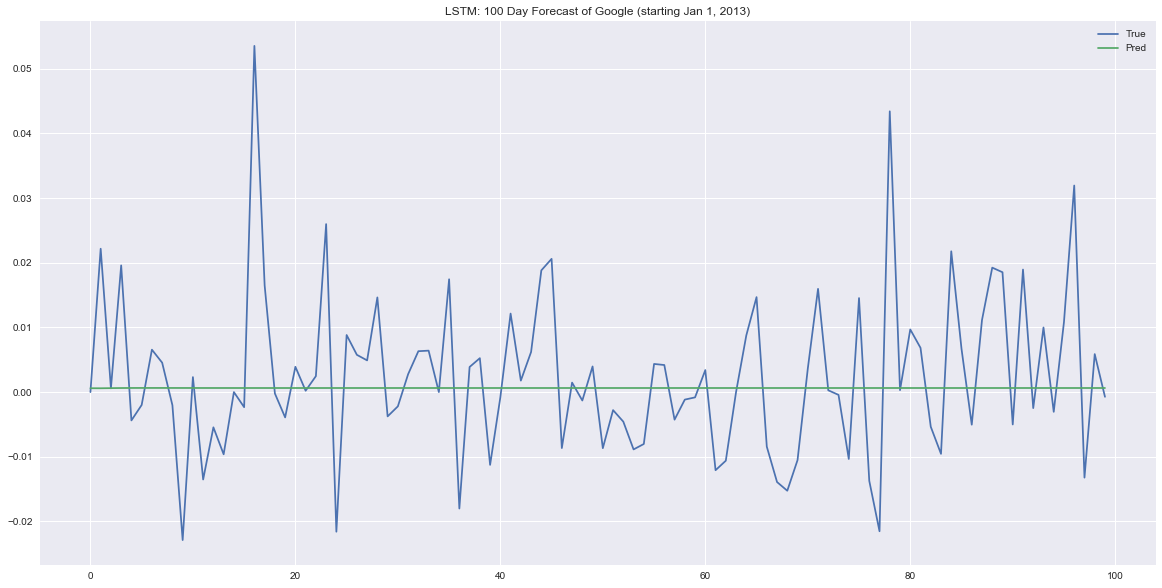

In [689]:
fig, ax = plt.subplots(figsize=(20,10))
ax.plot(company_prices_test.iloc[0:100, 0].values, label='True')
ax.plot(forecast_100_day[0], label='Pred')
ax.set_title('LSTM: 100 Day Forecast of Google (starting Jan 1, 2013)')
plt.legend()

The code creates a line plot to visualize the true values and the predicted values for the first company in the `company_prices_test` dataset. The plot is generated using Matplotlib.

It creates a figure and axes with a specified size using `plt.subplots(figsize=(20,10))`.

Then, it plots the true values from the `company_prices_test` dataset for the first 100 days using `ax.plot(company_prices_test.iloc[0:100, 0].values, label='True')`. The `.iloc` indexing is used to select the first 100 rows of the first column (prices) of the `company_prices_test` dataset.

Next, it plots the predicted values for the first 100 days from the `forecast_100_day` list using `ax.plot(forecast_100_day[0], label='Pred')`. The `forecast_100_day` list contains the predicted values generated by the LSTM model.

It sets the title of the plot using `ax.set_title('LSTM: 100 Day Forecast of Google (starting Jan 1, 2013)')`.

Finally, it adds a legend to the plot using `plt.legend()` to indicate the labels for the true and predicted values.

### Test generator evaluation

In [669]:
mae = price_only_model.evaluate_generator(test_gen, steps=test_steps)
print('Mean absolute error on test data: {:.6f}'.format(mae))

Mean absolute error on test data: 0.009176


This code evaluates the mean absolute error (MAE) of the predictions made by the LSTM model (`price_only_model`) on the test data. 

It uses the `evaluate_generator` function of the LSTM model to calculate the MAE. The `test_gen` generator is used as input, which provides batches of test data to the model. The `steps` parameter specifies the number of steps (or batches) to evaluate.

The calculated MAE is then printed using `print('Mean absolute error on test data: {:.6f}'.format(mae))`. It provides a measure of the average absolute difference between the true values and the predicted values of the test data.

ConvNet Feature Extraction

In [487]:
companies = ['GOOG', 'AMZN', 'MMM', 'CMG', 'DUK']

company_transcripts_train = [load_company_transcripts(company)['2009':'2012'] for company in companies]
company_prices_train = load_company_price_history(companies, normalize=True)['2009':'2012']

company_transcripts_test = [load_company_transcripts(company)['2013':'2014'] for company in companies]
company_prices_test = load_company_price_history(companies, normalize=True)['2013':'2014']

company_transcripts_val = [load_company_transcripts(company)['2015':'2016'] for company in companies]
company_prices_val = load_company_price_history(companies, normalize=True)['2015':'2016']

2017-09-20 15:28:39,731 - DEBUG - Reading company transcripts for GOOG
2017-09-20 15:28:39,801 - WARNING - 1 duplicates removed from file
2017-09-20 15:28:39,861 - DEBUG - Reading company transcripts for AMZN
2017-09-20 15:28:39,921 - DEBUG - Reading company transcripts for ADBE
2017-09-20 15:28:39,999 - DEBUG - Reading company transcripts for AAPL
2017-09-20 15:28:40,072 - DEBUG - Reading company prices for GOOG
2017-09-20 15:28:40,080 - DEBUG - Reading company prices for AMZN
2017-09-20 15:28:40,084 - DEBUG - Reading company prices for ADBE
2017-09-20 15:28:40,088 - DEBUG - Reading company prices for AAPL
2017-09-20 15:28:40,145 - INFO - Null values found after cleaning: False
2017-09-20 15:28:40,148 - DEBUG - Reading company transcripts for GOOG
2017-09-20 15:28:40,194 - WARNING - 1 duplicates removed from file
2017-09-20 15:28:40,259 - DEBUG - Reading company transcripts for AMZN
2017-09-20 15:28:40,317 - DEBUG - Reading company transcripts for ADBE
2017-09-20 15:28:40,383 - DEBUG 

This code prepares the training, testing, and validation data for multiple companies. 

For each company in the `companies` list, it loads the corresponding transcripts for the training, testing, and validation periods using the `load_company_transcripts` function. The training transcripts cover the years 2009-2012, the testing transcripts cover 2013-2014, and the validation transcripts cover 2015-2016.

Similarly, it loads the price history for the same set of companies using the `load_company_price_history` function, normalizing the prices to ensure consistency. The training price history covers the years 2009-2012, the testing price history covers 2013-2014, and the validation price history covers 2015-2016.

The result is separate sets of transcripts and price history data for training, testing, and validation, corresponding to each company in the `companies` list.

In [527]:
def text_generator(price_data, text_data, w2v_reduced, window=5, batch_size=1):
    '''
    Creates samples for ConvNet training which accepts a 2D array representation of text as input and predicts the
    following 5 day log-return. 
    
    Args:
        price_data: A Pandas DataFrame consisting of daily price information, consisting of multiple companies
        across the columns. 
        text_data: A list of Pandas Dataframes, each item in the list is a DataFrame of one company's collection
        of earnings call transcripts. 
        w2v_reduced: A dictionary mapping words to a 2D vector representation, used for converting the text
        into a 2D array representation. 
        
    Returns:
        text: A 2D array representation of an earnings call transcript.
        price_target: The resulting 5 day log-return after the earnings call took place. 
    '''
    companies = len(text_data)
    
    # Start with first transcript
    i = 0
    
    # Start with first company
    j = 0
    
    text_docs, lookup = process_text_for_input(text_data[j]['body'], w2v_reduced, norm='l2')
    
    while True:
        # If end of transcripts reached, go to next company
        if i >= len(lookup):
            i = 0
            if j+1 >= companies:
                j=0
            else:
                j+=1
                
            text_docs, lookup = process_text_for_input(text_data[j]['body'], w2v_reduced, norm='l2')
        
        
        event = lookup.index[i]
        text = text_docs[i].reshape(1, text_docs[i].shape[0], text_docs[i].shape[1], 1)
        price_target = company_prices[event : event + pd.to_timedelta('{} days'.format(window+1))].iloc[:,j].sum()
        
        yield text, np.array(price_target).reshape(1)
        
        i+= 1

This code defines a generator function that creates training samples for a ConvNet. 

The function takes price data, which is a Pandas DataFrame containing daily price information for multiple companies, and text data, which is a list of Pandas DataFrames where each DataFrame represents the collection of earnings call transcripts for a particular company.

The generator function iterates through the transcripts and generates training samples. It starts with the first transcript and the first company. It processes the text of the transcript using the `process_text_for_input` function, which converts the text into a 2D array representation using word embeddings (word-to-vector mapping).

The generator function then enters an infinite loop. It checks if it has reached the end of the transcripts for a particular company, and if so, it moves to the next company. It retrieves the 2D array representation of the current transcript and reshapes it to match the expected input shape for the ConvNet.

Next, it calculates the price target for the training sample. The price target is the sum of the prices for a window of days following the earnings call. The window size is defined by the `window` parameter.

The function yields the text (2D array representation of the transcript) and the price target as the output of each iteration.

The generator function continues looping through the transcripts and companies, generating training samples indefinitely.

In [528]:
window_size = 5
batch_size = 12

train_gen = text_generator(company_prices_train, company_transcripts_train, w2v_reduced, 
                           window=window_size, batch_size=batch_size)
train_steps = sum([len(company) for company in company_transcripts_train])


val_gen = text_generator(company_prices_val, company_transcripts_val, w2v_reduced, 
                         window=window_size, batch_size=batch_size)
val_steps = sum([len(company) for company in company_transcripts_val])


test_gen = text_generator(company_prices_test, company_transcripts_test, w2v_reduced, 
                          window=window_size, batch_size=batch_size) 
test_steps = sum([len(company) for company in company_transcripts_test])

This code sets up generators for training, validation, and testing data for a ConvNet model.

For training data, the `text_generator` function is called with the `company_prices_train` DataFrame, `company_transcripts_train` list, `w2v_reduced` dictionary, and the specified window size and batch size. This generator will yield training samples consisting of text (2D array representation of earnings call transcripts) and the corresponding price target (the sum of prices for a window of days following the earnings call). The `train_steps` variable is calculated as the sum of the lengths of all company transcripts in the training data.

Similarly, for validation data, the `text_generator` function is called with the `company_prices_val` DataFrame, `company_transcripts_val` list, `w2v_reduced` dictionary, and the specified window size and batch size. This generator will yield validation samples. The `val_steps` variable is calculated as the sum of the lengths of all company transcripts in the validation data.

For testing data, the `text_generator` function is called with the `company_prices_test` DataFrame, `company_transcripts_test` list, `w2v_reduced` dictionary, and the specified window size and batch size. This generator will yield testing samples. The `test_steps` variable is calculated as the sum of the lengths of all company transcripts in the testing data.

These generators and steps variables are essential for training and evaluating the ConvNet model, as they provide a way to feed the model with the necessary input data in batches and keep track of the number of steps needed for each dataset.

In [529]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D, Dropout

text_features = 10

text_model = Sequential()
text_model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(250, 250, 1)))
text_model.add(Conv2D(32, (3, 3), activation='relu'))
text_model.add(MaxPooling2D((4, 4)))
text_model.add(Conv2D(16, (3, 3), activation='relu'))
text_model.add(GlobalAveragePooling2D())
text_model.add(Dense(100, activation='relu'))
text_model.add(Dropout(0.4))
text_model.add(Dense(text_features, activation='relu'))
text_model.add(Dense(1, activation='linear'))

print(text_model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_71 (Conv2D)           (None, 250, 250, 32)      320       
_________________________________________________________________
conv2d_72 (Conv2D)           (None, 248, 248, 32)      9248      
_________________________________________________________________
max_pooling2d_24 (MaxPooling (None, 62, 62, 32)        0         
_________________________________________________________________
conv2d_73 (Conv2D)           (None, 60, 60, 16)        4624      
_________________________________________________________________
global_average_pooling2d_23  (None, 16)                0         
_________________________________________________________________
dense_55 (Dense)             (None, 100)               1700      
_________________________________________________________________
dropout_20 (Dropout)         (None, 100)               0         
__________

This code defines a ConvNet model for processing text features.

The `Sequential` model is initialized and the layers are added in a sequential manner. The first layer is a `Conv2D` layer with 32 filters, a kernel size of (3, 3), and ReLU activation. It takes input with a shape of (250, 250, 1), indicating a 2D array representation of text data. The padding is set to 'same', which means the input and output have the same spatial dimensions.

The next layer is another `Conv2D` layer with 32 filters and a kernel size of (3, 3). It is followed by a `MaxPooling2D` layer with a pooling size of (4, 4), which reduces the spatial dimensions of the feature maps.

The subsequent layer is a `Conv2D` layer with 16 filters and a kernel size of (3, 3). This is followed by a `GlobalAveragePooling2D` layer, which performs average pooling across the spatial dimensions of the feature maps.

The next layer is a fully connected `Dense` layer with 100 units and ReLU activation. A `Dropout` layer with a rate of 0.4 is added for regularization to prevent overfitting.

Another `Dense` layer with `text_features` units and ReLU activation is added, followed by a final `Dense` layer with 1 unit and linear activation, which produces the output prediction.

The `summary()` method is called to print a summary of the model architecture, showing the shapes and parameters of each layer.

In [530]:
from keras.callbacks import ModelCheckpoint 

text_model.compile(loss='mean_absolute_error', optimizer='adam')

checkpointer = ModelCheckpoint(filepath='saved_models/weights.best.text_feature_extractor.hdf5', 
                               verbose=1, save_best_only=True)

# Train LSTM
history = text_model.fit_generator(train_gen, steps_per_epoch=train_steps, epochs=20, callbacks=[checkpointer], 
                                         validation_data=val_gen, validation_steps=val_steps)

Epoch 1/20


2017-09-20 15:44:14,414 - INFO - 1 same-day events combined.


67/73 [==========================>...] - ETA: 1s - loss: 0.0634

2017-09-20 15:44:26,136 - INFO - 1 same-day events combined.


73/73 [==============================] - 15s - loss: 0.0625 - val_loss: 0.0616
Epoch 2/20
64/73 [=========================>....] - ETA: 1s - loss: 0.0631

2017-09-20 15:44:40,606 - INFO - 1 same-day events combined.


73/73 [==============================] - 14s - loss: 0.0620 - val_loss: 0.0614
Epoch 3/20
64/73 [=========================>....] - ETA: 1s - loss: 0.0624

2017-09-20 15:44:55,000 - INFO - 1 same-day events combined.


73/73 [==============================] - 14s - loss: 0.0612 - val_loss: 0.0619
Epoch 4/20
63/73 [========================>.....] - ETA: 1s - loss: 0.0622

2017-09-20 15:45:09,215 - INFO - 1 same-day events combined.


73/73 [==============================] - 14s - loss: 0.0606 - val_loss: 0.0635
Epoch 5/20
61/73 [========================>.....] - ETA: 2s - loss: 0.0628

2017-09-20 15:45:23,228 - INFO - 1 same-day events combined.


73/73 [==============================] - 14s - loss: 0.0602 - val_loss: 0.0639
Epoch 6/20
62/73 [========================>.....] - ETA: 1s - loss: 0.0623

2017-09-20 15:45:37,605 - INFO - 1 same-day events combined.


73/73 [==============================] - 14s - loss: 0.0599 - val_loss: 0.0639
Epoch 7/20
61/73 [========================>.....] - ETA: 2s - loss: 0.0629

2017-09-20 15:45:51,679 - INFO - 1 same-day events combined.


73/73 [==============================] - 13s - loss: 0.0598 - val_loss: 0.0638
Epoch 8/20
60/73 [=======================>......] - ETA: 2s - loss: 0.0636

2017-09-20 15:46:04,778 - INFO - 1 same-day events combined.


73/73 [==============================] - 13s - loss: 0.0595 - val_loss: 0.0638
Epoch 9/20
58/73 [======================>.......] - ETA: 2s - loss: 0.0646

2017-09-20 15:46:18,039 - INFO - 1 same-day events combined.


73/73 [==============================] - 13s - loss: 0.0605 - val_loss: 0.0638
Epoch 10/20
58/73 [======================>.......] - ETA: 2s - loss: 0.0643

2017-09-20 15:46:32,766 - INFO - 1 same-day events combined.


73/73 [==============================] - 14s - loss: 0.0596 - val_loss: 0.0638
Epoch 11/20
55/73 [=====================>........] - ETA: 3s - loss: 0.0660

2017-09-20 15:46:46,568 - INFO - 1 same-day events combined.


73/73 [==============================] - 14s - loss: 0.0604 - val_loss: 0.0639
Epoch 12/20
56/73 [======================>.......] - ETA: 2s - loss: 0.0653

2017-09-20 15:47:00,557 - INFO - 1 same-day events combined.


73/73 [==============================] - 13s - loss: 0.0600 - val_loss: 0.0639
Epoch 13/20
53/73 [====================>.........] - ETA: 3s - loss: 0.0664- ETA: 3s - loss: 0.06

2017-09-20 15:47:13,934 - INFO - 1 same-day events combined.


73/73 [==============================] - 13s - loss: 0.0598 - val_loss: 0.0640
Epoch 14/20
52/73 [====================>.........] - ETA: 3s - loss: 0.0672

2017-09-20 15:47:27,172 - INFO - 1 same-day events combined.


73/73 [==============================] - 13s - loss: 0.0600 - val_loss: 0.0640
Epoch 15/20
52/73 [====================>.........] - ETA: 3s - loss: 0.0670

2017-09-20 15:47:40,352 - INFO - 1 same-day events combined.


73/73 [==============================] - 13s - loss: 0.0609 - val_loss: 0.0641
Epoch 16/20
50/73 [===================>..........] - ETA: 3s - loss: 0.0669

2017-09-20 15:47:53,699 - INFO - 1 same-day events combined.


73/73 [==============================] - 13s - loss: 0.0595 - val_loss: 0.0641
Epoch 17/20
49/73 [===================>..........] - ETA: 3s - loss: 0.0683

2017-09-20 15:48:07,251 - INFO - 1 same-day events combined.


73/73 [==============================] - 14s - loss: 0.0597 - val_loss: 0.0641
Epoch 18/20
47/73 [==================>...........] - ETA: 4s - loss: 0.0700

2017-09-20 15:48:20,908 - INFO - 1 same-day events combined.


73/73 [==============================] - 14s - loss: 0.0608 - val_loss: 0.0641
Epoch 19/20
46/73 [=================>............] - ETA: 4s - loss: 0.0693

2017-09-20 15:48:34,990 - INFO - 1 same-day events combined.


73/73 [==============================] - 14s - loss: 0.0608 - val_loss: 0.0641
Epoch 20/20
47/73 [==================>...........] - ETA: 4s - loss: 0.0672

2017-09-20 15:48:49,127 - INFO - 1 same-day events combined.


73/73 [==============================] - 13s - loss: 0.0597 - val_loss: 0.0642


This code compiles and trains the text feature extraction model (`text_model`) using the training and validation data generators.

First, the model is compiled by specifying the loss function (`mean_absolute_error`) and optimizer (`adam`). This prepares the model for training.

A `ModelCheckpoint` callback is created to save the weights of the best performing model during training. It specifies the file path to save the weights, and the option `save_best_only=True` ensures that only the weights of the model with the lowest validation loss will be saved.

The `fit_generator` function is called to train the model. It takes the training data generator (`train_gen`) as input and specifies the number of steps per epoch (`train_steps`) and the number of epochs (in this case, 20). The `callbacks` argument is set to include the `ModelCheckpoint` callback for saving the best weights.

Additionally, the validation data generator (`val_gen`) and the number of validation steps (`val_steps`) are provided to evaluate the model's performance on the validation set during training.

The training history is stored in the `history` variable, which can be used to analyze the training and validation metrics and visualize the learning progress.

In [531]:
# Load weights from previous training
text_model.load_weights('saved_models/weights.best.text_feature_extractor.hdf5')

This code loads the weights of a previously trained text feature extraction model (`text_model`) from a saved file. 

By calling the `load_weights` function and providing the file path to the saved weights (`'saved_models/weights.best.text_feature_extractor.hdf5'`), the model is loaded with the previously learned weights. This allows you to reuse the trained model without having to retrain it from scratch.

Loading the weights is useful when you want to apply the pre-trained model to new data or continue training from the point where it was previously saved. The loaded model will have the same architecture and parameter values as the model that was previously trained and saved.

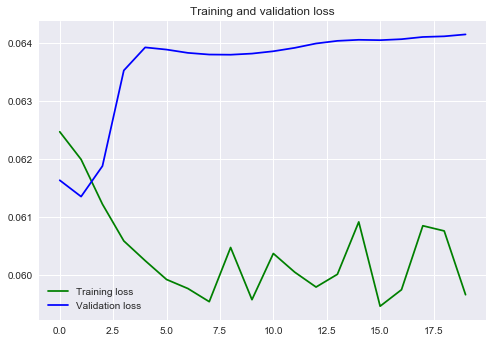

In [532]:
validation_curve(history)

The code `validation_curve(history)` is likely calling a function named `validation_curve` and passing the `history` object as an argument. 

Based on the function name, it is likely that the `validation_curve` function generates a plot or visualization that shows the training and validation loss over the course of training a machine learning model. 

By passing the `history` object to the `validation_curve` function, it can access the recorded loss values during the training process and use them to plot the training and validation curves. This visualization can help assess the performance and generalization of the model during training, showing whether it is overfitting or underfitting.

In [403]:
text_model.layers

The code `text_model.layers` returns a list of the layers in the `text_model`. Each layer represents a different operation or transformation applied to the input data. 

The list of layers provides information about the architecture and configuration of the neural network model. Each layer has properties such as the type of layer (e.g., Conv2D, MaxPooling2D), activation function, and number of parameters. 

By accessing the `text_model.layers` attribute, you can examine and analyze the individual layers of the model. This information can be useful for various purposes, such as understanding the model's structure, inspecting and modifying specific layers, or extracting and visualizing intermediate outputs or activations.

In [533]:
extract_features = Sequential()
extract_features.add(Conv2D(32, (3, 3), activation='relu', padding='same', 
                            input_shape=(250, 250, 1), weights=text_model.layers[0].get_weights()))
extract_features.add(Conv2D(32, (3, 3), activation='relu', weights=text_model.layers[1].get_weights()))
extract_features.add(MaxPooling2D((4, 4), weights=text_model.layers[2].get_weights()))
extract_features.add(Conv2D(16, (3, 3), activation='relu', weights=text_model.layers[3].get_weights()))
extract_features.add(GlobalAveragePooling2D(weights=text_model.layers[4].get_weights()))
extract_features.add(Dense(100, activation='relu', weights=text_model.layers[5].get_weights()))
extract_features.add(Dropout(0.4, weights=text_model.layers[6].get_weights()))
extract_features.add(Dense(text_features, activation='linear', weights=text_model.layers[7].get_weights()))

The code defines a new sequential model called `extract_features` that is built by extracting and transferring the weights from specific layers of the `text_model` into corresponding layers of the new model.

Each layer in the `extract_features` model corresponds to a layer in the `text_model`. The weights from the corresponding layers in the `text_model` are retrieved using the `get_weights()` method and set as the weights for the respective layers in the `extract_features` model.

By doing this, the `extract_features` model inherits the learned weights from the `text_model`, allowing it to perform the same transformations and computations on input data. This can be useful when you want to use the pre-trained features extracted by the `text_model` in another model or for a different task without retraining the entire model.

In [536]:
extract_features.predict(text)

array([[-0.0212712 ,  0.00477908, -0.01075181,  0.00255826, -0.01825933,
        -0.00846098,  0.01881904, -0.00580684, -0.01098066, -0.01511178]], dtype=float32)

The code `extract_features.predict(text)` performs a prediction using the `extract_features` model on the given input `text`. 

The `extract_features` model is a pre-trained model that has learned to extract features from input data. By calling the `predict` method on the model and providing the `text` as input, the model applies its learned transformations and computations to the input text and generates predictions based on the extracted features.

The output of the `predict` method will be the predicted values or representations based on the extracted features. The exact interpretation and format of the predictions will depend on the specific task and architecture of the `extract_features` model.

In [537]:
# Run this cell to inspect a new example
text, price = next(test_gen)

print('Predicted return:\t{}'.format(text_model.predict(text)[0][0]))
print('True return:\t\t{}'.format(price[0]))

Predicted return:	0.01737634837627411
True return:		0.06355231462064292


The code snippet provided is used to inspect a new example and compare the predicted return with the true return.

First, the `next(test_gen)` function is called to retrieve the next example from the `test_gen` generator. This example consists of `text` and `price` data.

Then, the `text_model.predict(text)` function is used to make a prediction on the `text` data. The predicted return is obtained from the prediction result.

The true return is retrieved from the `price` variable.

Finally, the predicted return and the true return are printed to the console for inspection and comparison.

In [539]:
# Visualize input
from PIL import Image
pillow_image = Image.fromarray(1500*text[0, :, :, 0])
pillow_image.show()

The provided code snippet is used to visualize the input data.

First, the code imports the `Image` class from the `PIL` library.

Next, the `Image.fromarray()` function is called to create an `Image` object. It takes the input `text` data and applies a scaling factor of 1500 to enhance the visualization. The input data is assumed to be a 4-dimensional array with shape `(batch_size, height, width, channels)`, and the first example in the batch is selected (`text[0]`). The `[:, :, 0]` indexing is used to access the values of the first channel in the input data.

Finally, the `show()` method is called on the `pillow_image` object to display the image visualization.

### Evalute model

In [538]:
mae = text_model.evaluate_generator(test_gen, steps=test_steps)
print('Mean absolute error on test data: {}'.format(mae))

Mean absolute error on test data: 0.057885023705180616


The provided code calculates the mean absolute error (MAE) on the test data using the trained `text_model`.

First, the `evaluate_generator()` method is called on the `text_model` with the `test_gen` generator as input. This method evaluates the model's performance on the test data by predicting the output values and comparing them with the true values. It calculates the MAE metric.

The `steps` parameter specifies the number of steps to iterate over the test data generator. It is set to `test_steps`, which represents the total number of steps needed to complete one epoch of the test data.

Finally, the calculated MAE value is printed using the `print()` function, indicating the mean absolute error on the test data.

LSTM Price+Text Prediction

In [710]:
companies = ['GOOG', 'AMZN', 'MMM', 'CMG', 'DUK']

company_transcripts_train = [load_company_transcripts(company)['2009':'2012'] for company in companies]
company_prices_train = load_company_price_history(companies, normalize=True)['2009':'2012']

company_transcripts_test = [load_company_transcripts(company)['2013':'2014'] for company in companies]
company_prices_test = load_company_price_history(companies, normalize=True)['2013':'2014']

company_transcripts_val = [load_company_transcripts(company)['2015':'2016'] for company in companies]
company_prices_val = load_company_price_history(companies, normalize=True)['2015':'2016']

2017-09-22 14:25:08,678 - DEBUG - Reading company transcripts for GOOG
2017-09-22 14:25:09,014 - WARNING - 1 duplicates removed from file
2017-09-22 14:25:09,150 - DEBUG - Reading company transcripts for AMZN
2017-09-22 14:25:09,280 - DEBUG - Reading company transcripts for MMM
2017-09-22 14:25:09,437 - DEBUG - Reading company transcripts for CMG
2017-09-22 14:25:09,488 - WARNING - 1 duplicates removed from file
2017-09-22 14:25:09,556 - DEBUG - Reading company transcripts for DUK
2017-09-22 14:25:09,699 - DEBUG - Reading company prices for GOOG
2017-09-22 14:25:09,711 - DEBUG - Reading company prices for AMZN
2017-09-22 14:25:09,716 - DEBUG - Reading company prices for MMM
2017-09-22 14:25:09,720 - DEBUG - Reading company prices for CMG
2017-09-22 14:25:09,725 - DEBUG - Reading company prices for DUK
2017-09-22 14:25:09,801 - INFO - Null values found after cleaning: False
2017-09-22 14:25:09,805 - DEBUG - Reading company transcripts for GOOG
2017-09-22 14:25:09,898 - WARNING - 1 dupli

The provided code defines and organizes the data for training, testing, and validation of a model using company transcripts and price history.

The variable `companies` contains a list of company names.

`company_transcripts_train` is a list that stores the transcripts of the specified companies for the years 2009 to 2012. The function `load_company_transcripts()` is called for each company, and the resulting transcripts are filtered based on the specified date range.

`company_prices_train` is a DataFrame that stores the price history of the specified companies for the years 2009 to 2012. The function `load_company_price_history()` is called with the list of companies, and the resulting price history is filtered based on the specified date range. The prices are also normalized.

Similarly, `company_transcripts_test` and `company_transcripts_val` store the transcripts of the specified companies for the years 2013 to 2014 and 2015 to 2016, respectively. These lists are created by calling `load_company_transcripts()` and filtering the transcripts based on the corresponding date ranges.

`company_prices_test` and `company_prices_val` store the price history of the specified companies for the years 2013 to 2014 and 2015 to 2016, respectively. These DataFrames are created by calling `load_company_price_history()` and filtering the price history based on the corresponding date ranges. The prices are also normalized.

In [711]:
window_size = 180
batch_size = 128
text_features = 10

train_gen = price_text_generator(company_prices_train, company_transcripts_train, w2v_reduced, extract_features, 
                                 text_features=text_features, window=window_size, batch_size=batch_size)
train_steps = (company_prices_train.shape[0] // batch_size)*company_prices_train.shape[1]


val_gen = price_text_generator(company_prices_val, company_transcripts_val, w2v_reduced, extract_features, 
                               text_features=text_features, window=window_size, batch_size=batch_size)
val_steps = (company_prices_test.shape[0] // batch_size)*company_prices_test.shape[1]


test_gen = price_text_generator(company_prices_test, company_transcripts_test, w2v_reduced, extract_features, 
                                text_features=text_features, window=window_size, batch_size=batch_size) 
test_steps = (company_prices_test.shape[0] // batch_size)*company_prices_test.shape[1]

The provided code sets up generators for training, validation, and testing data that combine price history and textual data.

The variables `window_size`, `batch_size`, and `text_features` define the size of the sliding window, the number of samples in each batch, and the number of features in the textual data, respectively.

`train_gen` is a generator that combines the price history (`company_prices_train`) and transcripts (`company_transcripts_train`) of the companies. It uses the `price_text_generator()` function, which takes the price history, transcripts, reduced word embeddings (`w2v_reduced`), and the extracted features (`extract_features`). It also specifies the window size, batch size, and the number of text features. The generator will yield batches of input and output data for training. The `train_steps` variable is calculated based on the number of training data points and the batch size.

Similarly, `val_gen` and `test_gen` are generators for the validation and testing data. They use the corresponding price history and transcripts for validation (`company_prices_val`, `company_transcripts_val`) and testing (`company_prices_test`, `company_transcripts_test`). The generators are configured with the same parameters as `train_gen`. The `val_steps` and `test_steps` variables are calculated based on the number of validation and testing data points and the batch size, respectively.

In [712]:
def price_text_generator(price_data, text_data, w2v_reduced, extract_features_model, text_features, 
                         window=180, batch_size=128):
    ''' Creates samples for training, combining daily price information with extracted text features.
    
    Training/validation/testing data must be split prior to this generator. 
    
    Args:
        price_data: A Pandas DataFrame consisting of daily price information, consisting of multiple companies
        across the columns. 
        text_data: A list of Pandas Dataframes, each item in the list is a DataFrame of one company's collection
        of earnings call transcripts. 
        w2v_reduced: A dictionary mapping words to a 2D vector representation, used for converting the text
        into a 2D array representation.
        extract_features_model: ConvNet model for extracting features from text. 
        text_features: Number of text features extracted from extract_features_model.
        window: Length to build input and output sequences. 
        batch_size: Number of samples to return for batch training. 
        
    Yields:
        input_features: A sequence of prices and daily extracted text features
        [t-window, t-window+1, t-window+2, ..., t-1]
        output_prices: A sequence of prices offset by one day: [t-window+1, t-window+2, t-window+3, ..., t] 
    '''
    
    timesteps = price_data.shape[0]
    companies = price_data.shape[1]
    
    if window + batch_size > timesteps:
        logging.warning('Not enough data to fill a batch, forcing smaller batch size.')
        batch_size = timesteps - window
    
    # Index to keep track of place within price timeseries, corresponds with the last day of output
    i = window
    
    # Index to keep track of company
    j = 0
    
    # Prepare text
    text_docs, lookup = process_text_for_input(text_data[j]['body'], w2v_reduced, norm='l2')
    lookup = lookup.reindex(price_data)
    
    # Create empty array to fill with text features
    text = np.empty((len(lookup), text_features))
    
    # Get text features
    for i, val in enumerate(lookup):
        if np.isnan(val):
            text[i] = np.zeros(text_features)
        else:
            val = int(val)
            text[i] = extract_features_model.predict(text_docs[val].reshape(250, 250, 1))

    while True:
        # If there aren't enough sequential days to fill a batch, start back at top
        if i + batch_size >= timesteps:
            i = window
            
            if j+1 >= companies:
                j=0
            else:
                j+=1
                # Prepare text
                text_docs, lookup = process_text_for_input(text_data[j]['body'], w2v_reduced, norm='l2')
                lookup = lookup.reindex(price_data)

        
        samples = np.arange(i, i + batch_size)
        i += len(samples)
        
        input_prices = np.zeros((batch_size, window, 1))
        input_text = np.zeros((batch_size, window, text_features))
        output_prices = np.zeros((batch_size, window, 1))
        
        for k, sample in enumerate(samples):
            input_prices[k] = price_data.iloc[np.arange(sample-window, sample),j].values.reshape(window, 1)
            input_text[k] = text[sample-window : sample]
            output_prices[k] = price_data.iloc[np.arange(sample-window+1, sample+1),j].values.reshape(window, 1)
        
        input_prices_with_text = np.append(input_prices, input_text, axis=2)
        
        yield input_prices_with_text, output_prices

The provided code defines a generator function, `price_text_generator`, which generates training samples that combine daily price information with extracted text features.

The generator takes several inputs: `price_data` (a Pandas DataFrame with daily price information for multiple companies), `text_data` (a list of Pandas DataFrames containing earnings call transcripts), `w2v_reduced` (a dictionary mapping words to vector representations), `extract_features_model` (a ConvNet model for extracting features from text), `text_features` (the number of text features extracted), `window` (the length of the input and output sequences), and `batch_size` (the number of samples to return for batch training).

The generator first checks if there is enough data to fill a batch. If not, it adjusts the batch size accordingly.

It then initializes variables to keep track of the position within the price time series (`i`) and the company (`j`). The text is processed using the `process_text_for_input` function, and the extracted text features are obtained using the `extract_features_model`. The text features are stored in a `text` array.

The generator enters an infinite loop, generating batches of input and output data. If there aren't enough sequential days to fill a batch, it starts back at the top. The generator selects a range of samples and constructs arrays for input prices, input text features, and output prices. The input prices and text features are combined into a single array. This input-output pair is then yielded by the generator.

The generator continuously loops and yields batches of input-output pairs as long as it is called.

In [713]:
input_features, output_prices = next(train_gen)

2017-09-22 14:25:23,171 - INFO - 1 same-day events combined.


The provided code retrieves the next batch of training data from the `train_gen` generator. Specifically, it assigns the values returned by the generator to the variables `input_features` and `output_prices`. 

`input_features` will contain a batch of input data consisting of both price information and extracted text features. The shape of `input_features` will be `(batch_size, window, num_features)`, where `batch_size` is the number of samples in the batch, `window` is the length of the input sequence, and `num_features` is the total number of features (price information + text features) in the input.

`output_prices` will contain the corresponding batch of output data, which represents the target prices. The shape of `output_prices` will be `(batch_size, window, 1)`, where `window` is the length of the output sequence. Each value in `output_prices` corresponds to the price at a specific time step following the input sequence.

Overall, this code retrieves a single batch of training data, containing input features and corresponding output prices, from the `train_gen` generator.

In [714]:
print('Input features: {}'.format(input_features.shape))
print('Output prices: {}'.format(output_prices.shape))

Input features: (128, 180, 11)
Output prices: (128, 180, 1)


The provided code prints the shapes of the `input_features` and `output_prices` arrays. 

The line `print('Input features: {}'.format(input_features.shape))` prints the shape of the `input_features` array, which represents the input data for the model. The shape will be in the format `(batch_size, window, num_features)`, where `batch_size` is the number of samples in the batch, `window` is the length of the input sequence, and `num_features` is the total number of features (price information + text features) in the input.

Similarly, the line `print('Output prices: {}'.format(output_prices.shape))` prints the shape of the `output_prices` array, which represents the target output for the model. The shape will be in the format `(batch_size, window, 1)`, where `batch_size` is the number of samples in the batch and `window` is the length of the output sequence. Each value in `output_prices` corresponds to the price at a specific time step following the input sequence.

Overall, these lines of code provide information about the shapes of the input features and output prices, giving insights into the dimensions of the data being used for training or evaluation.